# MIMIC-II IAC Introduction

This tutorial explores the **M**ultiparameter **I**ntelligent **M**onitoring in **I**ntensive **C**are II (**MIMIC-II**) **I**ndwelling **A**rterial **C**atheters (**IAC**) dataset, as subset derived from MIMIC-II, the publicly-accessible critical care database. The database was created for the purpose of a case study in the book ["Secondary Analysis of Electronic Health Records"](https://link.springer.com/book/10.1007/978-3-319-43742-2), published by Springer in 2016. In particular, the MIMIC-II IAC dataset was used throughout Chapter 16 (Data Analysis) by Raffa J. et al. to investigate the effectiveness of indwelling arterial catheters in hemodynamically stable patients with respiratory failure for mortality outcomes. 

More details on the dataset such as all included features and their description can be found [here](https://physionet.org/content/mimic2-iaccd/1.0/)

Overview of the MIMIC-II database extracted from the original book:

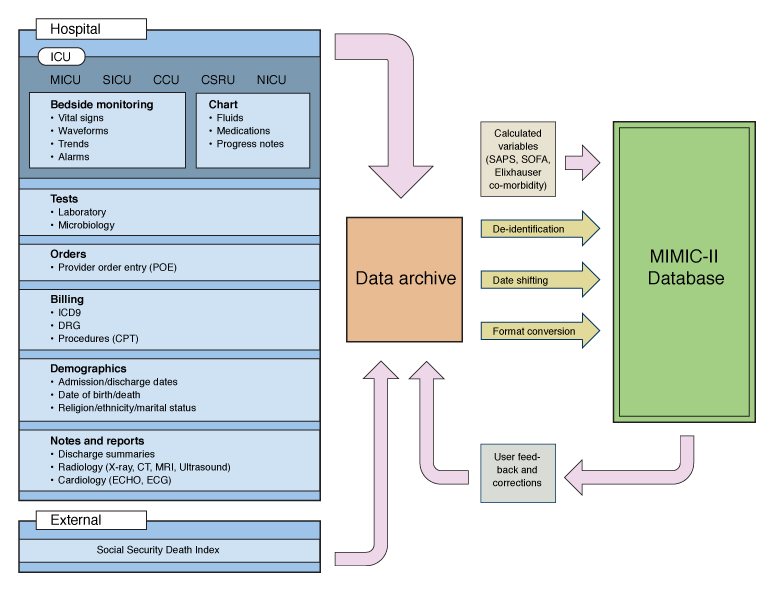

In [7]:
from IPython.display import Image
Image(filename="images/MIMIC-II-database-structure.png", width=400)

In this tutorial we want to explore the MIMIC-II IAC dataset using ehrapy to identidy patient groups and their associated features.   

The major steps of an analysis with ehrapy include:

1. Preprocessing and quality control (QC)

2. Dimensionality reduction

3. Batch effect identification

4. Clustering 

5. Additional downstream analysis

&nbsp;

Before we start with the analysis of the MIMIC-II IAC dataset, we set up our environment including the import of packages and preparation of the dataset.

_________________

## Environment setup

Ensure that the latest version of ehrapy is installed. A list of all dependency versions can be found at the end of this tutorial.

In [8]:
import ehrapy as ep
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

We are ignoring a few warnings for readability reasons.

In [10]:
import warnings
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)
warnings.simplefilter("ignore", category=UserWarning)

&NewLine;  
&NewLine;  


### MIMIC-II IAC dataset loading

ehrapy offers several [datasets](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#data) in AnnData format that can be used out of the box.
In this tutorial we will use the MIMIC-II IAC dataset with unencoded features. ehrapy's default encoding is a simple one-hot encoding in this case. More details on encoding can be seen in the next step.

In [11]:
adata = ep.dt.mimic_2(encoded=False)
adata

2023-07-20 10:42:41,843 - root INFO - Added all columns to `obs`.
2023-07-20 10:42:41,861 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `1776` x `46`.


AnnData object with n_obs × n_vars = 1776 × 46
    uns: 'numerical_columns', 'non_numerical_columns'
    layers: 'original'

The MIMIC-II dataset has 1776 patients with 46 features. 
<br>
Now that we have our AnnData file ready, we can start the analysis using ehrapy and the first step will be to preprocess the dataset.

_________________

## Analysis using ehrapy

### Preprocessing

The dataset contains 46 features as previously mentoined. However, not all features are numerical as some are categorical which need encoding. We first identify categorical (non-numerical features) variables.

In [12]:
adata.uns["non_numerical_columns"]

['service_unit', 'day_icu_intime']

We identified **service_unit** and **day_icu_intime** as categorical features. We will therefore encode them first with one-hot encoding. This ensures that no ordering is preserved for the respective features. ehrapy also offers other [encoding](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#encoding) functions.

In [13]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["service_unit", "day_icu_intime"]}
)

2023-07-20 10:42:42,015 - root INFO - The original categorical values `['service_unit', 'day_icu_intime']` were added to uns.


Output()

2023-07-20 10:42:42,038 - root INFO - Updated the original layer after encoding.
2023-07-20 10:42:42,045 - root INFO - Added `['service_unit', 'day_icu_intime']` columns to `X`.
2023-07-20 10:42:42,051 - root INFO - The original categorical values `['service_unit', 'day_icu_intime']` were added to obs.


In [14]:
adata

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'numerical_columns', 'non_numerical_columns', 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding'
    layers: 'original'

After one-hot encoding the two features, we have expanded our matrix from 46 to 54 features.

To verify that we have encoded all features correctly and are ready to proceed, we can use the `type_overview()` function.

In [15]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 1776 obs and 54 vars
╠══ 🔐 Encoded variables
║   ╠══ service_unit -> 3 categories; one hot encoded; original data type: string
║   ╚══ day_icu_intime -> 7 categories; one hot encoded; original data type: string
╚══ 🔓 Unencoded variables
    ╠══ aline_flg -> data type: floating
    ╠══ icu_los_day -> data type: floating
    ╠══ hospital_los_day -> data type: floating
    ╠══ age -> data type: floating
    ╠══ gender_num -> data type: floating
    ╠══ weight_first -> data type: floating
    ╠══ bmi -> data type: floating
    ╠══ sapsi_first -> data type: floating
    ╠══ sofa_first -> data type: floating
    ╠══ service_num -> data type: floating
    ╠══ day_icu_intime_num -> data type: floating
    ╠══ hour_icu_intime -> data type: floating
    ╠══ hosp_exp_flg -> data type: floating
    ╠══ icu_exp_flg -> data type: floating
    ╠══ day_28_flg -> data type: floating
    ╠══ mort_day_censored -> data type: floating
    ╠══ censor_flg -> data type: floating
    ╠══ sepsis_flg -> data type: floating
    ╠══ chf_flg -> data type: floating
    ╠══ afib_flg -> data type: floating
    ╠══ renal_flg -> data type: floating
    ╠══ liver_flg -> data type: floating
    ╠══ copd_flg -> data type: floating
    ╠══ cad_flg -> data type: floating
    ╠══ stroke_flg -> data type: floating
    ╠══ mal_flg -> data type: floating
    ╠══ resp_flg -> data type: floating
    ╠══ map_1st -> data type: floating
    ╠══ hr_1st -> data type: floating
    ╠══ temp_1st -> data type: floating
    ╠══ spo2_1st -> data type: floating
    ╠══ abg_count -> data type: floating
    ╠══ wbc_first -> data type: floating
    ╠══ hgb_first -> data type: floating
    ╠══ platelet_first -> data type: floating
    ╠══ sodium_first -> data type: floating
    ╠══ potassium_first -> data type: floating
    ╠══ tco2_first -> data type: floating
    ╠══ chloride_first -> data type: floating
    ╠══ bun_first -> data type: floating
    ╠══ creatinine_first -> data type: floating
    ╠══ po2_first -> data type: floating
    ╠══ pco2_first -> data type: floating
    ╚══ iv_day_1 -> data type: floating

&NewLine;  
&NewLine;  


### Quality Control (QC)

#### Demographics distribution

To see if we have strong differences by demographics, we can check these features in a violin plot.

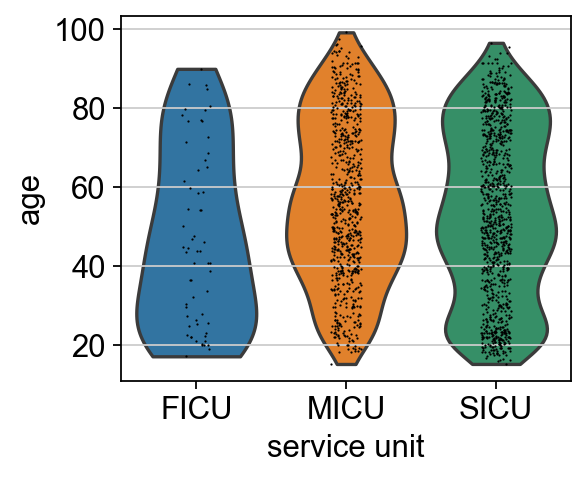

In [16]:
ep.settings.set_figure_params(figsize=(4, 3))
ep.pl.violin(adata, keys=['age'], groupby="service_unit")

#### Missing values

ehrapy's `pp.qc_metrics()` function will calculate several useful metrics such as the absolute number and percentages of missing values and properties like the mean/median/min/max of all features. The percentage of missing values is important as features with too many missing values should not be included. 

In [17]:
_ = ep.pp.qc_metrics(adata)
ep.pl.qc_metrics(adata)

2023-07-20 10:42:42,929 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


                                             Ehrapy qc metrics of var                                              
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column name ┃ missing_va… ┃ missing_va… ┃        mean ┃       median ┃ standard_d… ┃          min ┃         max ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│ ehrapycat_… │         0.0 │         0.0 │         nan │          nan │         nan │          nan │         nan │
│   aline_flg │         0.0 │         0.0 │ 0.55405405… │          1.0 │ 0.49706957… │          0.0 │         1.0 │
│ icu_los_day │         0.0 │         0.0 │ 3.34649774… │ 2.185000061… │ 3.35531576… │          0.5 │ 28.2399997… │
│ hospital_l… │         0.0 │         0.0 │ 8.11092342… │          6.0 │ 8.15486189… │          1.0 │       112.0 │
│         age │         0.0 │         0.0 │ 54.3796599… │ 53.67858505… │ 21.0569234… │ 15.18023014… │ 99.1109466… │
│  gender_num │         1.0 │ 0.05630630… │ 0.57746478… │          1.0 │ 0.49396275… │          0.0 │         1.0 │
│ weight_fir… │       110.0 │ 6.19369369… │ 80.0759483… │         77.0 │ 22.4837652… │         30.0 │ 257.600006… │
│         bmi │       466.0 │ 26.2387387… │ 27.8273155… │ 26.32484626… │ 8.20693988… │ 12.78487682… │ 98.7971343… │
│ sapsi_first │        85.0 │ 4.78603603… │ 14.1366055… │         14.0 │ 4.11308538… │          3.0 │        32.0 │
│  sofa_first │         6.0 │ 0.33783783… │ 5.82090395… │          6.0 │ 2.33400634… │          0.0 │        17.0 │
│ service_num │         0.0 │         0.0 │ 0.55292792… │          1.0 │ 0.49719074… │          0.0 │         1.0 │
│ day_icu_in… │         0.0 │         0.0 │ 4.05405405… │          4.0 │ 1.99391117… │          1.0 │         7.0 │
│ hour_icu_i… │         0.0 │         0.0 │ 10.5855855… │          9.0 │ 7.92273324… │          0.0 │        23.0 │
│ hosp_exp_f… │         0.0 │         0.0 │ 0.13738738… │          0.0 │ 0.34425585… │          0.0 │         1.0 │
│ icu_exp_flg │         0.0 │         0.0 │ 0.09572072… │          0.0 │ 0.29420785… │          0.0 │         1.0 │
│  day_28_flg │         0.0 │         0.0 │ 0.15934684… │          0.0 │ 0.36599922… │          0.0 │         1.0 │
│ mort_day_c… │         0.0 │         0.0 │ 614.329825… │        731.0 │ 402.996045… │          0.0 │ 3094.08007… │
│  censor_flg │         0.0 │         0.0 │ 0.72015765… │          1.0 │ 0.44892160… │          0.0 │         1.0 │
│  sepsis_flg │         0.0 │         0.0 │         0.0 │          0.0 │         0.0 │          0.0 │         0.0 │
│     chf_flg │         0.0 │         0.0 │ 0.11993243… │          0.0 │ 0.32488250… │          0.0 │         1.0 │
│    afib_flg │         0.0 │         0.0 │ 0.11655405… │          0.0 │ 0.32088815… │          0.0 │         1.0 │
│   renal_flg │         0.0 │         0.0 │ 0.03378378… 

All properties will be added to the respective layers. Categorical features can be found in the **obs** layer, while numerical features are in the **var** layer of the AnnData object. When inspecting both layers, we see that our QC properites were added for each feature if possible.

In [18]:
adata.obs.head(4)

service_unit day_icu_intime  missing_values_abs  missing_values_pct
0         SICU      Friday                      0            0.000000
1         MICU      Saturday                   12           22.222222
2         MICU      Friday                      0            0.000000
3         SICU      Saturday                    3            5.555556

In [19]:
adata.var.tail(4)

missing_values_abs  missing_values_pct         mean  \
creatinine_first                   6            0.337838     1.095706   
po2_first                        186           10.472973   227.623270   
pco2_first                       186           10.472973    43.413836   
iv_day_1                         143            8.051802  1622.907946   

                       median  standard_deviation   min           max  
creatinine_first     0.900000            1.083171   0.0     18.299999  
po2_first          195.000000          144.817841  22.0    634.000000  
pco2_first          41.000000           13.976388   8.0    158.000000  
iv_day_1          1081.529175         1676.615567   0.0  13910.000000

We can also represent the missing values in a histogram for both **obs** and **var** features.

[Text(0.5, 1.0, 'pct of missing values: var')]

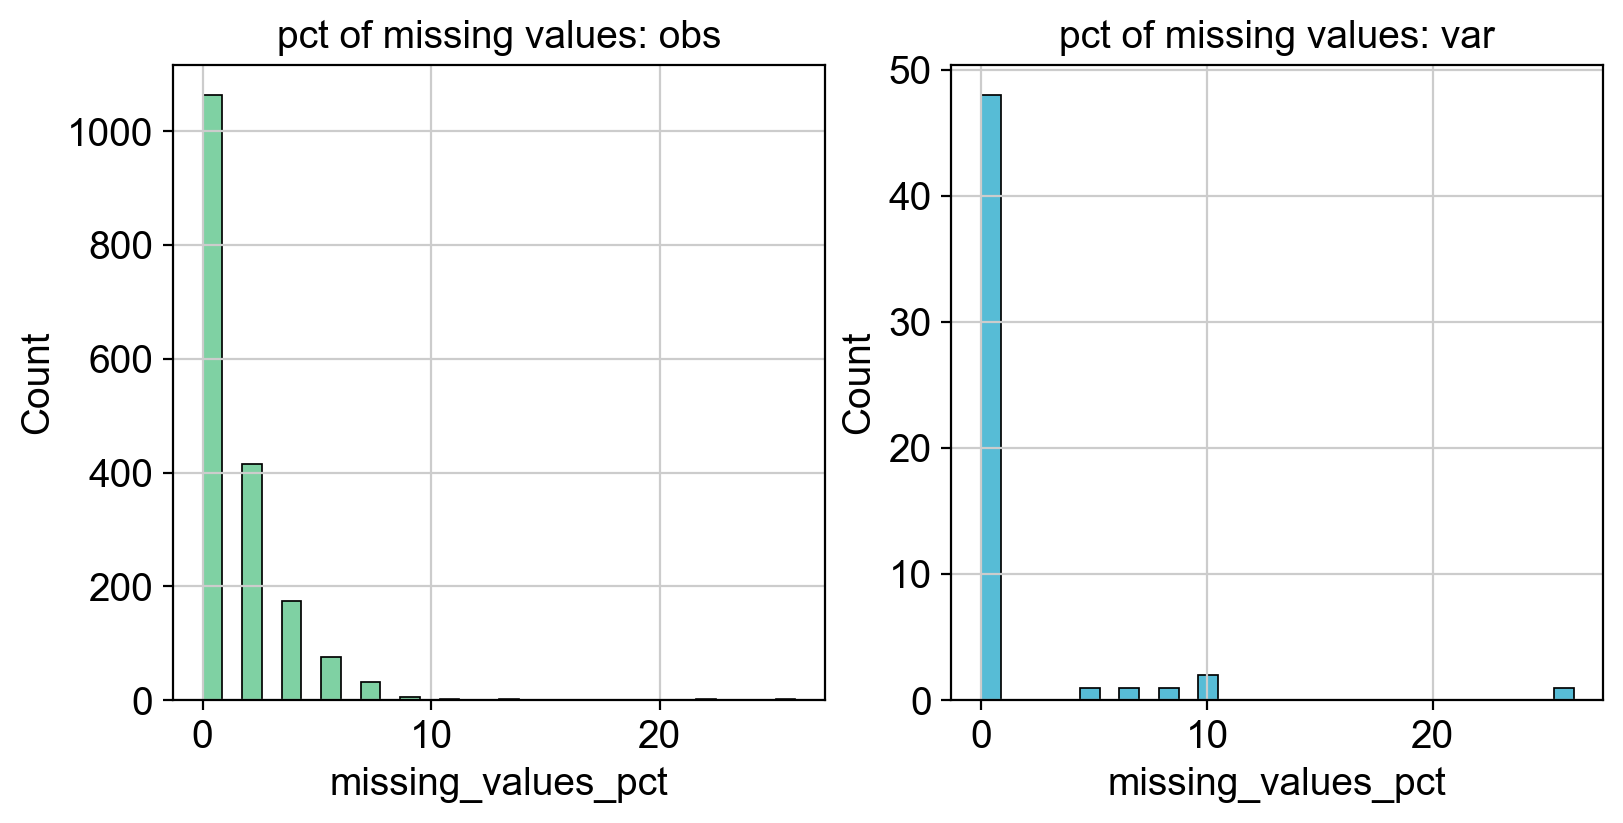

In [20]:
axd = plt.figure(constrained_layout=True, figsize=(8,4), dpi=100).subplot_mosaic(
    """
    AB
    """)

sns.histplot(adata.obs["missing_values_pct"], ax=axd['A'], bins = 30, color = "#54C285").set(title='pct of missing values: obs')
sns.histplot(adata.var["missing_values_pct"], ax=axd['B'], bins = 30, color = "#1FA6C9").set(title='pct of missing values: var')

&NewLine;  
&NewLine;  

We can also check which features have the highest percentage of missing values in both **obs** and **vars**.

In [21]:
adata.obs.loc[adata.obs["missing_values_pct"] == adata.obs["missing_values_pct"].max(), :]

service_unit day_icu_intime  missing_values_abs  missing_values_pct
1732         SICU      Thursday                   14           25.925926
1751         MICU      Tuesday                    14           25.925926

In [22]:
adata.var.loc[adata.var["missing_values_pct"] == adata.var["missing_values_pct"].max(), :]

missing_values_abs  missing_values_pct       mean     median  \
bmi                 466           26.238739  27.827316  26.324846   

     standard_deviation        min        max  
bmi             8.20694  12.784877  98.797134

&NewLine;  
&NewLine;  

Overall, the percentage of missing values in all features is rather low, however, still some features are not complete.

Features with missing values can introduce a bias in the data, making the processing and analysis challenging. To prevent loss of information due to dropping of multiple features, we can fill up the missing values by performing an imputation. Here, we infer the missing values based on the exisitng part of the data. 

To perform this efficiently, we suggest to drop features if the percentage of missing values is very high (>60%). In our data, there is no need to drop any feature, since none exceeds more than 27% missing values (BMI, vars).

&NewLine;  
&NewLine;  


#### Missing data imputation

ehrapy offers many options to [impute](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#imputation) missing values in an AnnData object.
Here, we use KNN imputation with 5 neighbors (`n_neighbours=5`, the default value). The KNN algorithm uses proximity to predict the missing values of a feature by finding the `k` closest neighbours to the missing value and then imputing the missing value based on the non-missing values in the neighbourhood.

In [23]:
ep.pp.knn_impute(adata, n_neighbours=5)

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

Output()

After recalcuating the QC metrices, we can check again the percentage of missing values.

In [24]:
_ = ep.pp.qc_metrics(adata)

2023-07-20 10:42:44,905 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


[Text(0.5, 1.0, 'pct of missing values: var'), (0.0, 30.0)]

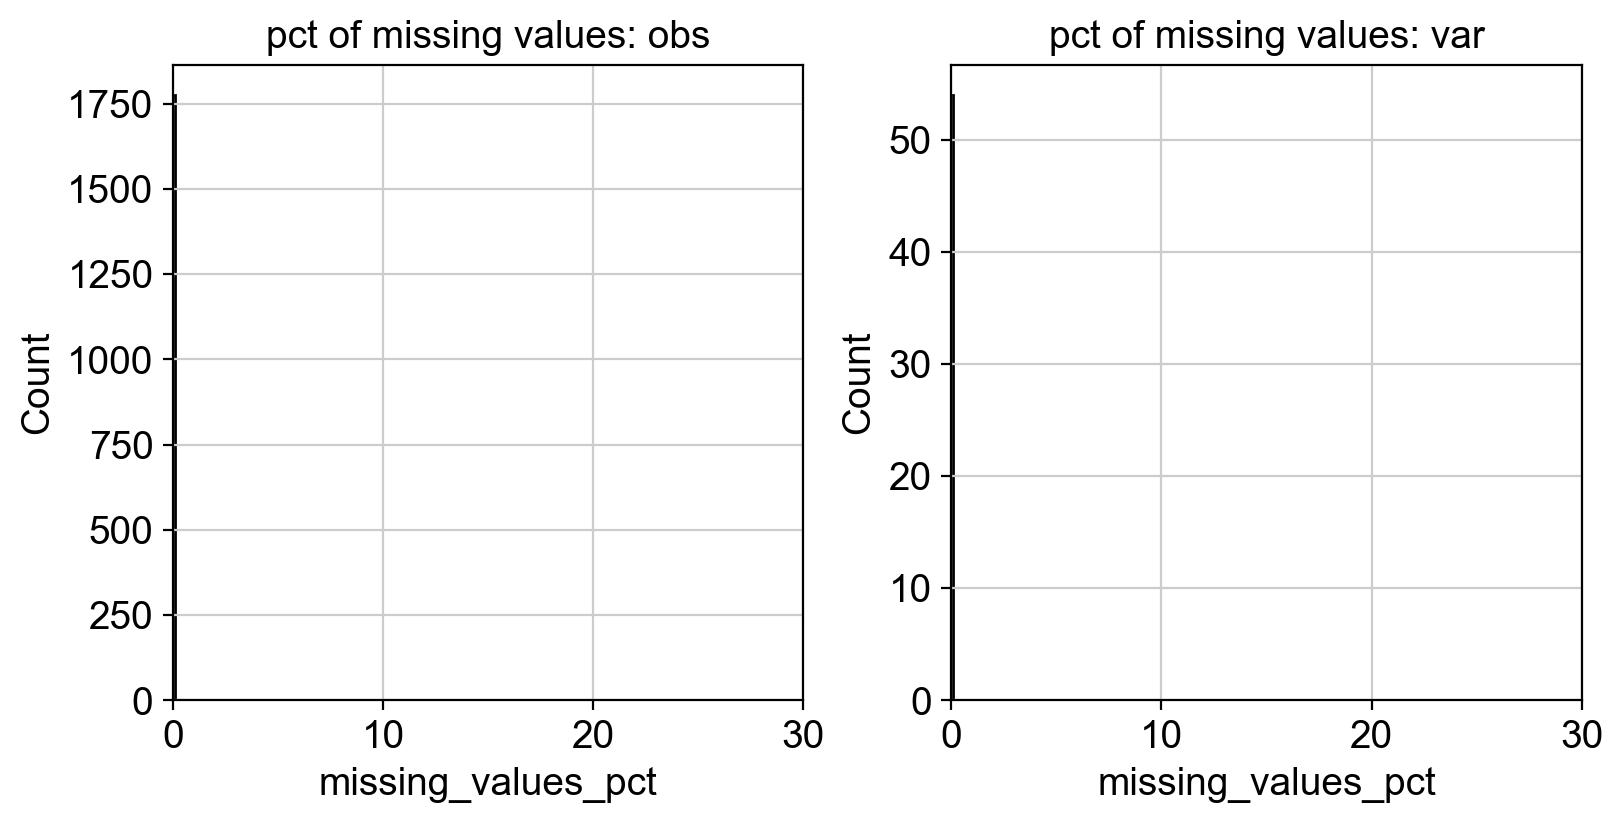

In [25]:
axd = plt.figure(constrained_layout=True, figsize=(8,4), dpi=100).subplot_mosaic(
    """
    AB
    """)

sns.histplot(adata.obs["missing_values_pct"], ax=axd['A'], bins = 5, color = "#54C285").set(title='pct of missing values: obs', xlim=(0, 30))
sns.histplot(adata.var["missing_values_pct"], ax=axd['B'], bins = 5, color = "#1FA6C9").set(title='pct of missing values: var', xlim=(0, 30))

#### Data distribution

Depending on the measurement and the unit of a measurement the value ranges of features may be huge.
Clusterings and differential comparisons especially may be greatly influenced by exceptionally big values. 

[Text(0.5, 1.0, 'maximum values')]

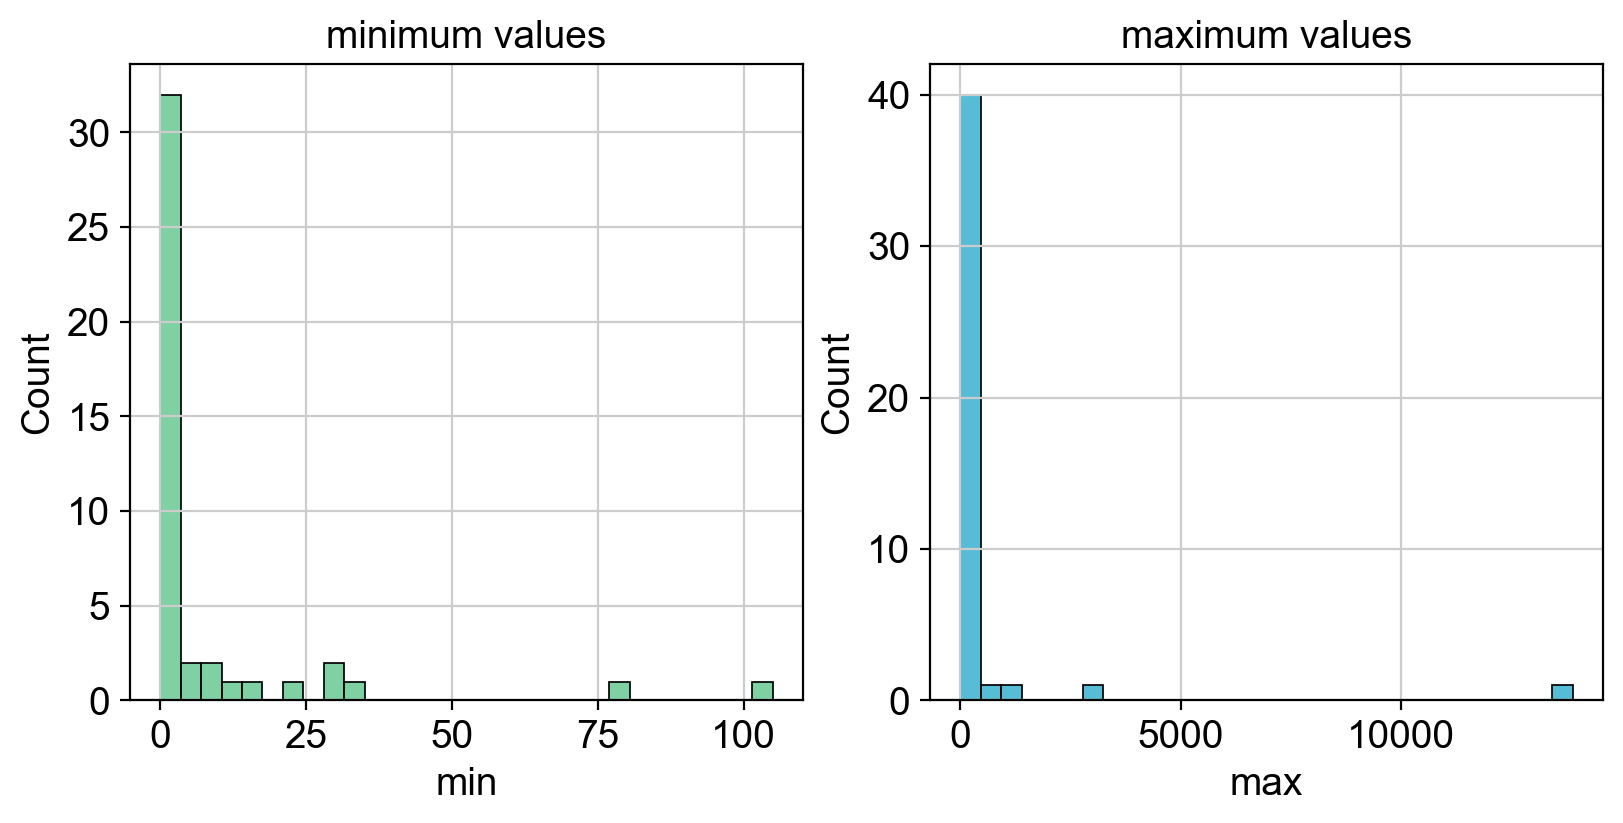

In [26]:
axd = plt.figure(constrained_layout=True, figsize=(8,4), dpi=100).subplot_mosaic(
    """
    AB
    """)

sns.histplot(adata.var["min"], ax=axd['A'], bins = 30, color = "#54C285").set(title='minimum values')
sns.histplot(adata.var["max"], ax=axd['B'], bins = 30, color = "#1FA6C9").set(title='maximum values')

Moreover, features which have a very high coefficient of variation can strongly influence dimensionality reduction. However, since the coefficient of variation performs weak with features that have small means, we only select those which have no small mean. 

In [27]:
adata.var["coefficient.variation"] = (adata.var["standard_deviation"]/adata.var["mean"])*100

In [28]:
adata.var.loc[(adata.var["coefficient.variation"] > 50) & (adata.var["mean"] >50), ]

missing_values_abs  missing_values_pct         mean  \
mort_day_censored                   0                 0.0   614.329825   
po2_first                           0                 0.0   230.324887   
iv_day_1                            0                 0.0  1613.196693   

                   median  standard_deviation   min           max  \
mort_day_censored   731.0          402.996046   0.0   3094.080078   
po2_first           204.0          139.134923  22.0    634.000000   
iv_day_1           1150.0         1619.062172   0.0  13910.000000   

                   coefficient.variation  
mort_day_censored              65.599297  
po2_first                      60.408115  
iv_day_1                      100.363594

&NewLine;  
&NewLine;  

The standard deviations and coefficients of variation of the features **iv_day_1** (input fluids by IV on day 1 in mL) and **po2_first** (first PaO_2 in mmHg) are very high with strong spread between minimum and maximum values. These features require normalization. 

&NewLine;  
&NewLine;  


### Normalization

ehrapy offers several options to [normalize](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#normalization) data. While it is possible to normalize all numerical values at once with the same normalization function, normalizing only the features with high spread, here **iv_day_1** and **po2_first**, can be sufficient.
Log normalization with an offset of 1 to add pseudocounts seems appropriate.

Note: When features with negative values should be normalized you have to use the `pp.offset_negative_values()` function prior normalization.

In [29]:
ep.pp.log_norm(adata, vars=['iv_day_1', "po2_first"], offset=1)

2023-07-20 10:42:46,558 - root INFO - Column names for numeric variables ['iv_day_1', 'po2_first'] were replaced by [[5.2832036 7.7105975]
 [5.1973915 6.398595 ]
 [5.7004437 7.643866 ]
 ...
 [5.757007  5.0657544]
 [4.4426513 3.125444 ]
 [6.35437   8.38229  ]].


AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime', 'missing_values_abs', 'missing_values_pct'
    var: 'missing_values_abs', 'missing_values_pct', 'mean', 'median', 'standard_deviation', 'min', 'max', 'coefficient.variation'
    uns: 'numerical_columns', 'non_numerical_columns', 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding', 'service_unit_colors', 'normalization'
    layers: 'original', 'raw_norm'

&NewLine;  
&NewLine;  

After normalization we can calculate the QC metrices again and check the distribution. 

In [30]:
_ = ep.pp.qc_metrics(adata)

2023-07-20 10:42:46,782 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


In [31]:
adata.var["coefficient.variation"] = (adata.var["standard_deviation"]/adata.var["mean"])*100
adata.var.loc[(adata.var["coefficient.variation"] > 50) & (adata.var["mean"] >50), ]

missing_values_abs  missing_values_pct        mean  median  \
mort_day_censored                   0                 0.0  614.329825   731.0   

                   standard_deviation  min          max  coefficient.variation  
mort_day_censored          402.996046  0.0  3094.080078              65.599297

&NewLine;  
&NewLine;  

The strong spread of **iv_day_1** and **po2_first** was succesfully removed. Now that we normalized the influence of these features, we can continue with dimensionality reduction. 

Dimensionality reduction reduces the number of features (dimensions) by projecting the data to a lower dimensional latent space retaining as much information as possible. This is very useful for high dimensional data, since it reduces complexity and facilitates visualization 

&NewLine;  
&NewLine;  


### Dimensionality reduction

#### Principle Component Analysis (PCA)

As a next step, we reduce the dimensionality of the dataset with [principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
We can also visualize the principal components with ehrapy using the `components` argument.

In [32]:
ep.pp.pca(adata)

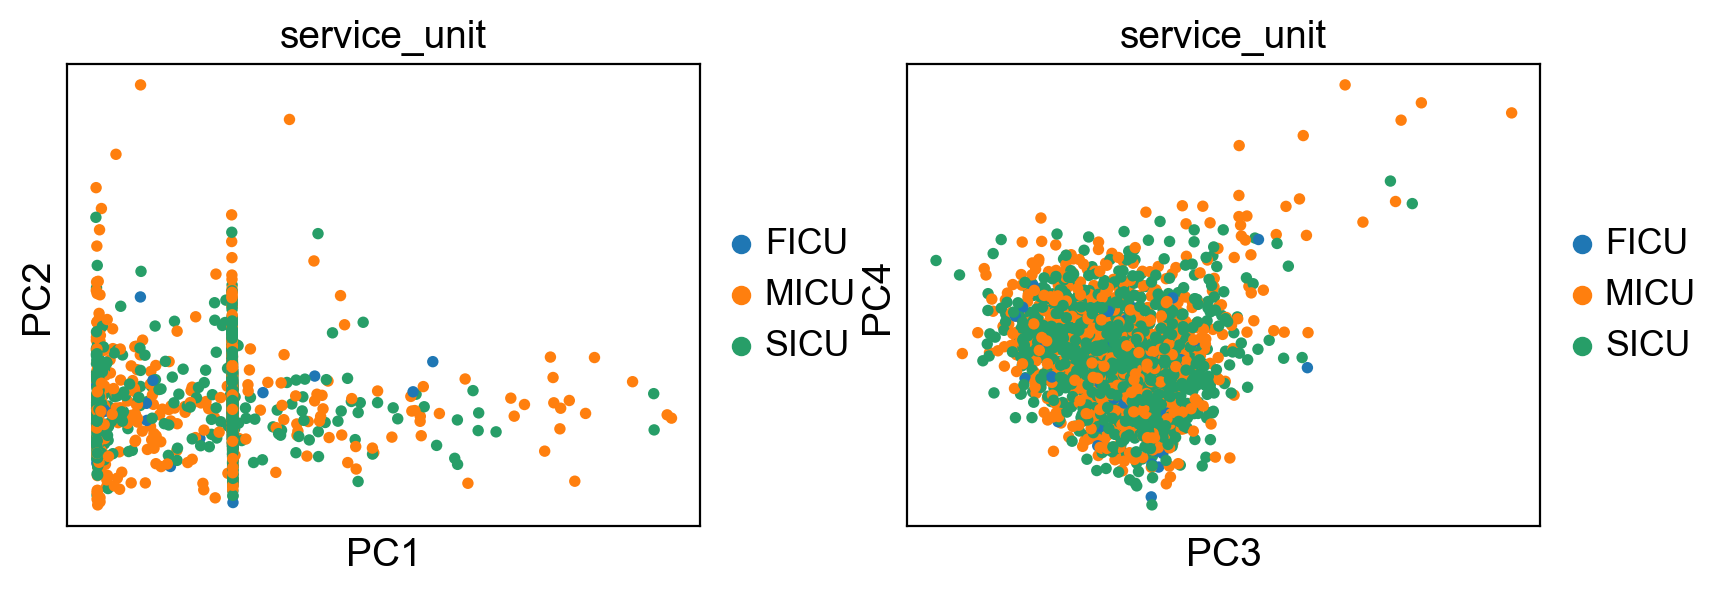

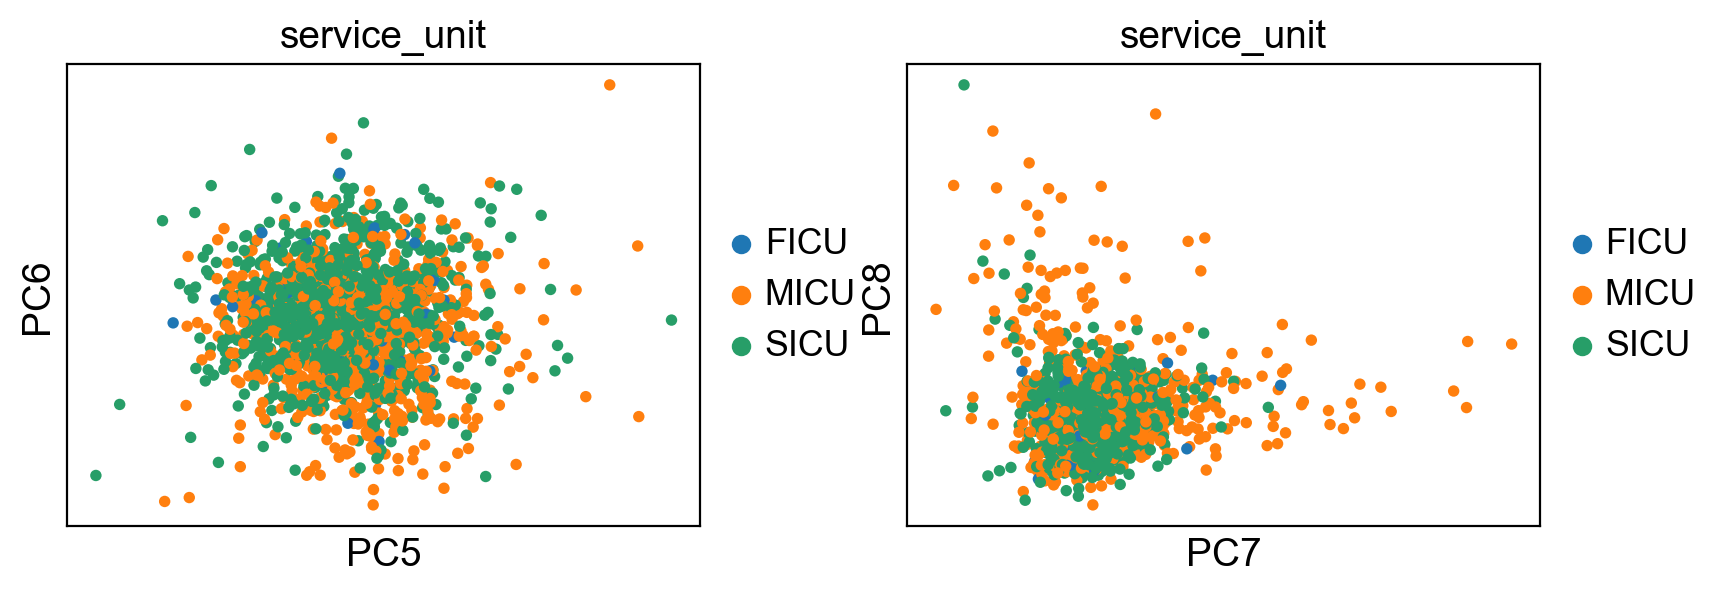

In [62]:
ep.settings.set_figure_params(figsize=(4, 3), dpi = 100)
ep.pl.pca(adata, color="service_unit", components= ["1,2", "3,4"])
ep.pl.pca(adata, color="service_unit", components= ["5,6", "7,8"])

To inspect certain PCs further, we can inspect the PC dimensionality loadings which highlight the features that contribute strongest to the selected PC.

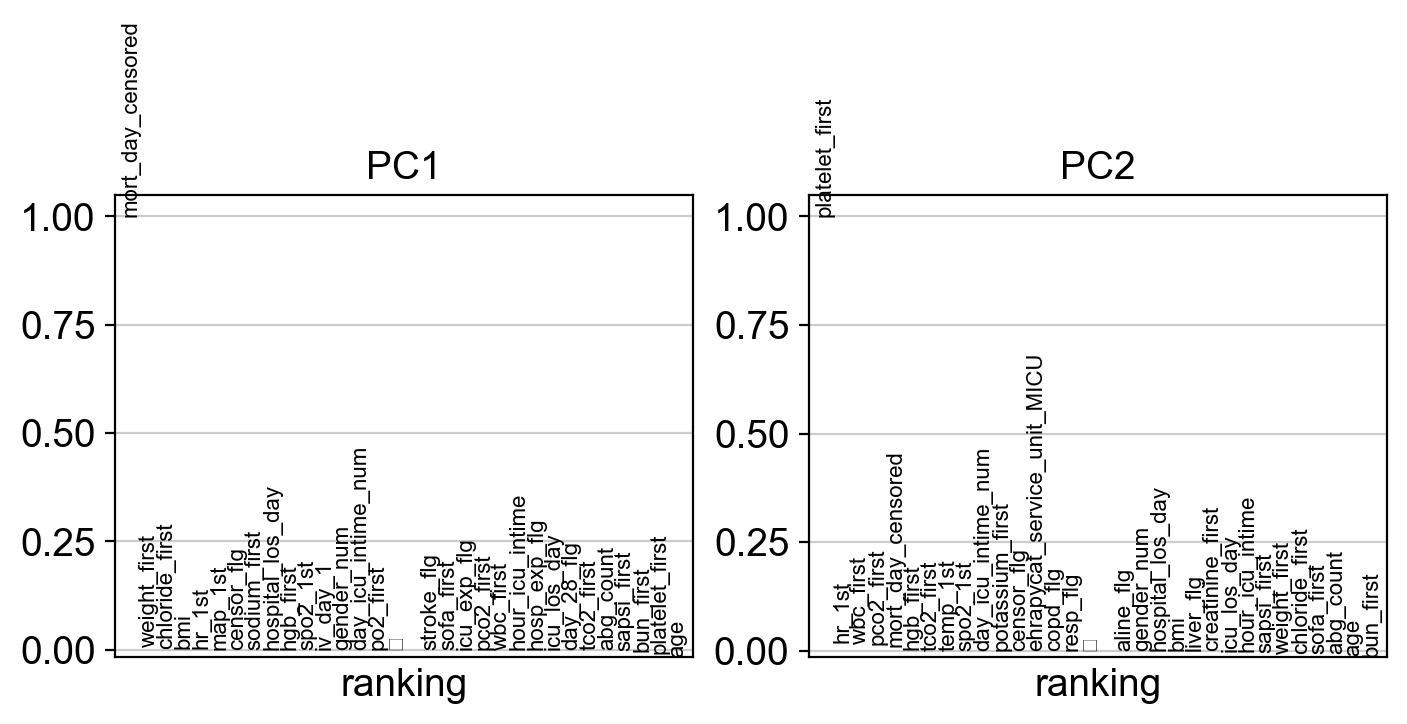

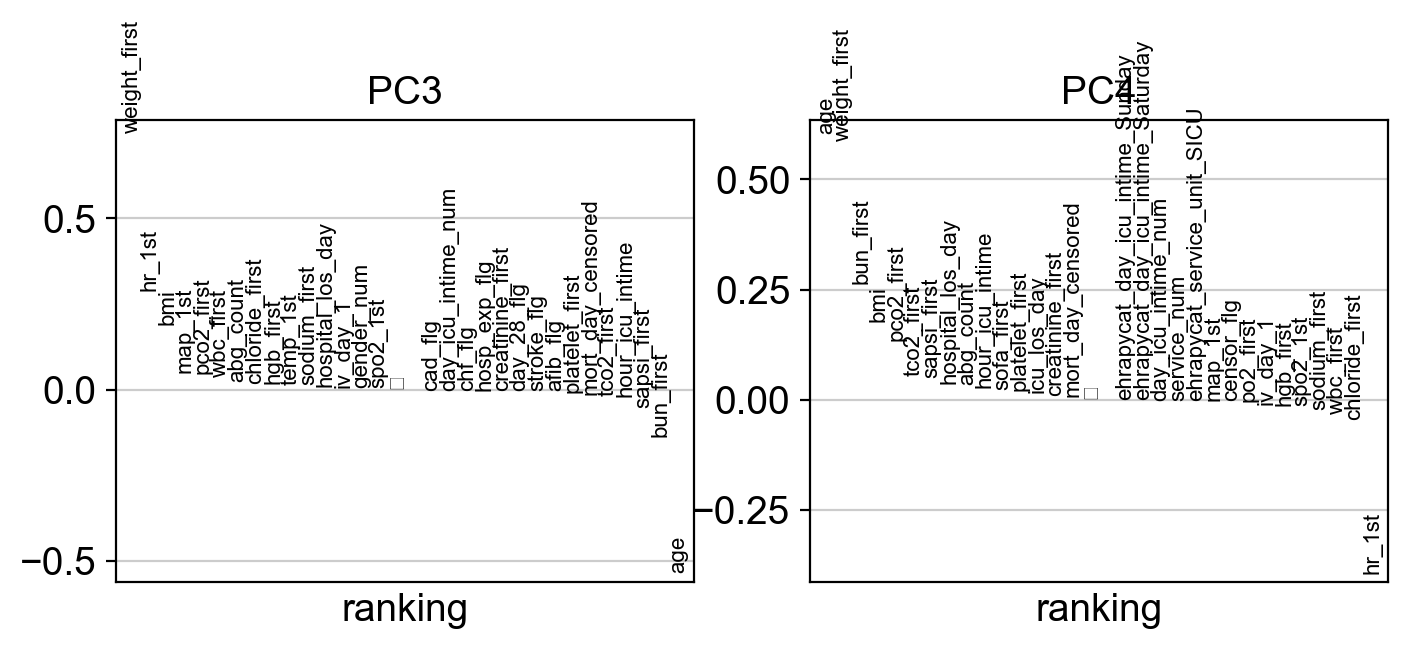

In [63]:
ep.settings.set_figure_params(figsize=(4, 3), dpi = 100)
ep.pl.pca_loadings(adata, components='1, 2')
ep.pl.pca_loadings(adata, components='3, 4')

&NewLine;  
&NewLine;  


#### Uniform Manifold Approximation and Projection (UMAP) 

The reduced representation can then be used as input for the neighbours graph calculation which serves as the input for advanced embeddings and visualizations like [Uniform Manifold Approximation and Projection (UMAP) ](https://umap-learn.readthedocs.io/en/latest/)

In [65]:
ep.pp.neighbors(adata, n_pcs=10)

In [66]:
ep.tl.umap(adata)

&NewLine;  
&NewLine;  


### Checking for Batch effects

Before exploring the data further, we need to see if we have a batch effect. A batch effect can e.g. arise from different collection units or collection days. To check if our data contains a batch for those feautures, we visualize the **service_unit** and the **day_icu_intime**.

If a batch effect is present, we can use the `pp.combat()` function to remove effects.

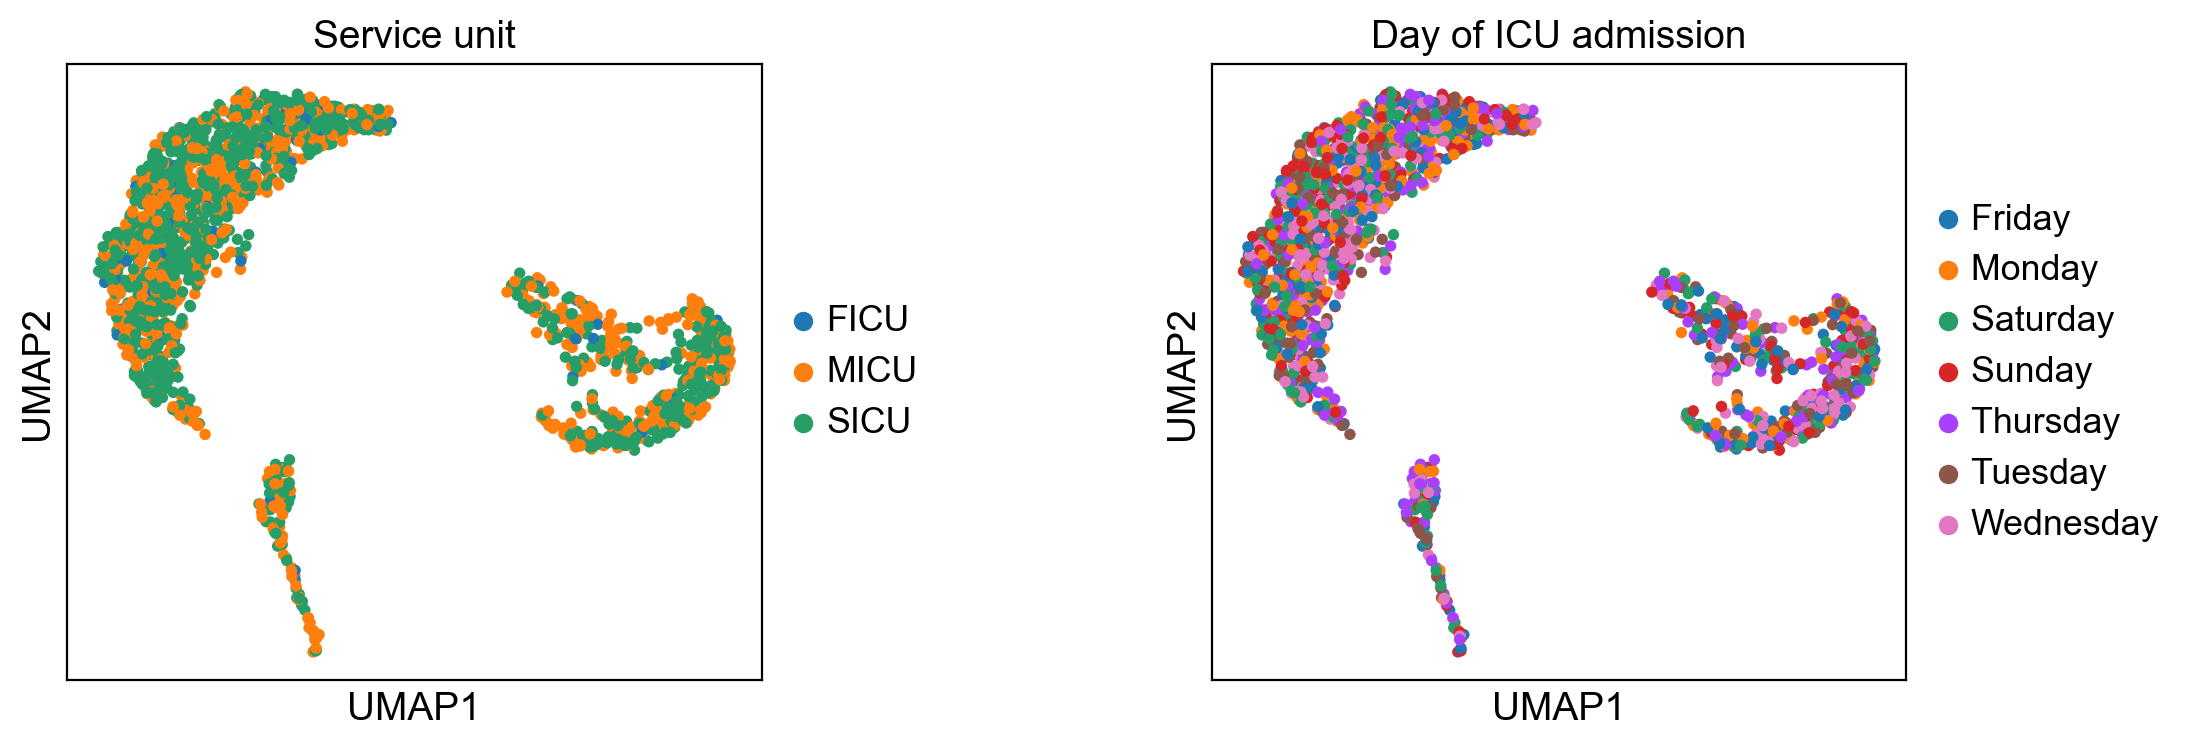

In [68]:
ep.settings.set_figure_params(figsize=(4, 4), dpi = 100)
ep.pl.umap(
    adata,
    color=["service_unit", "day_icu_intime", ],
    wspace=0.5,
    title=["Service unit", "Day of ICU admission"],
)

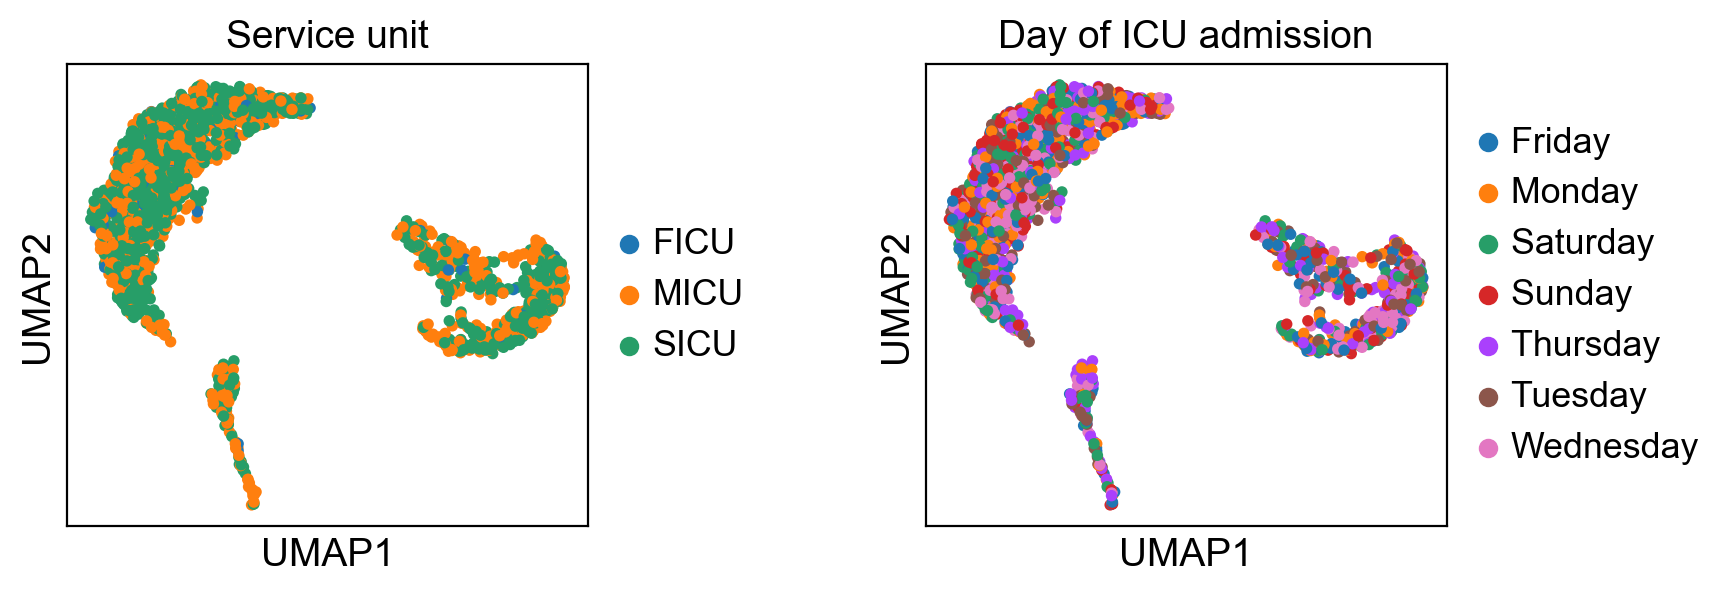

In [74]:
ep.settings.set_figure_params(figsize=(3, 3), dpi = 100)
ep.pl.umap(
    adata,
    color=["service_unit", "day_icu_intime", ],
    wspace=0.5,
    title=["Service unit", "Day of ICU admission"], 
)

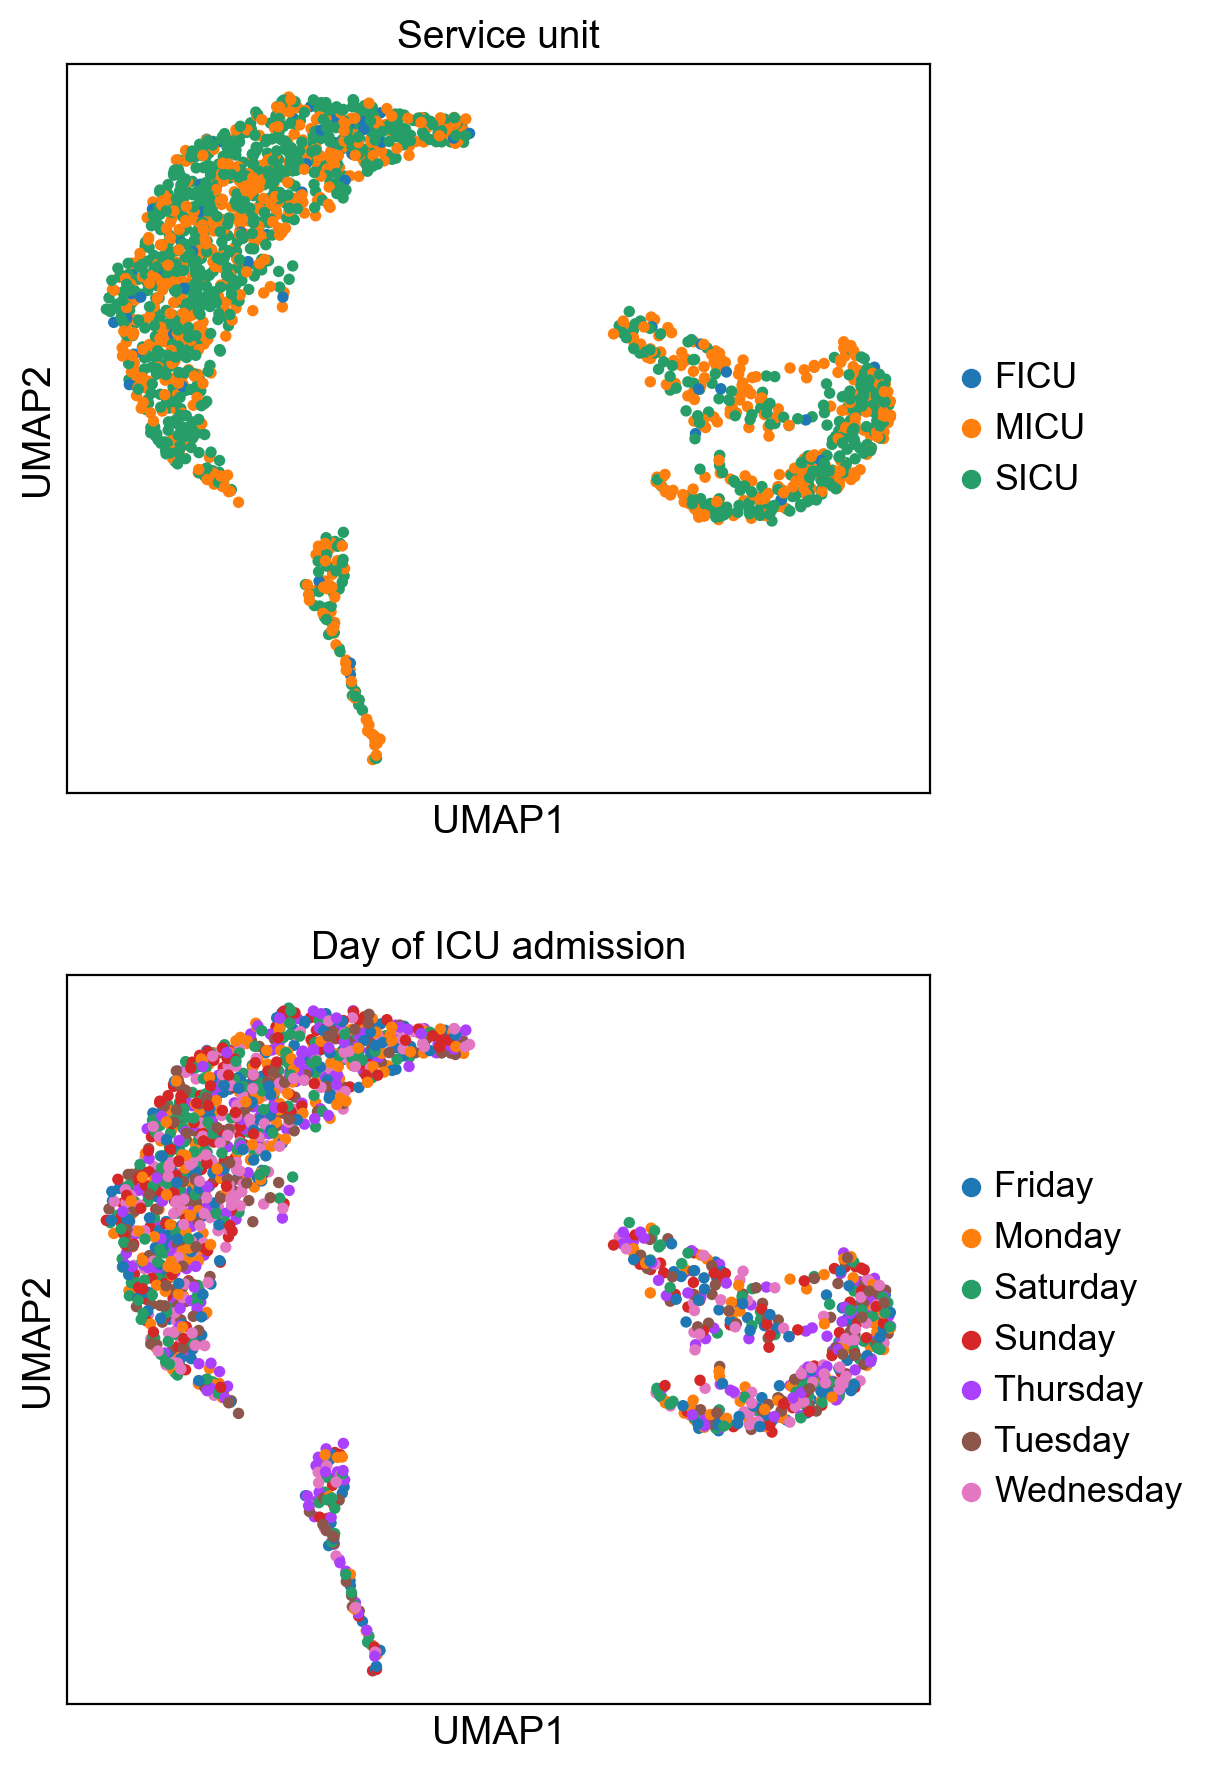

In [70]:
ep.settings.set_figure_params(figsize=(4, 5), dpi = 100)
ep.pl.umap(
    adata,
    color=["service_unit", "day_icu_intime", ],
    wspace=0.5, ncols = 1,
    title=["Service unit", "Day of ICU admission"], 
)

The embeddings suggest that there's no strong effect by the aforementioned potential confounders.

&NewLine;  
&NewLine;  


### Selected features on UMAP

Now we can also highlight other relevant feautres on the UMAP. Interesting features could be demographics, hospital statistics and lab parameters.

#### Demographics

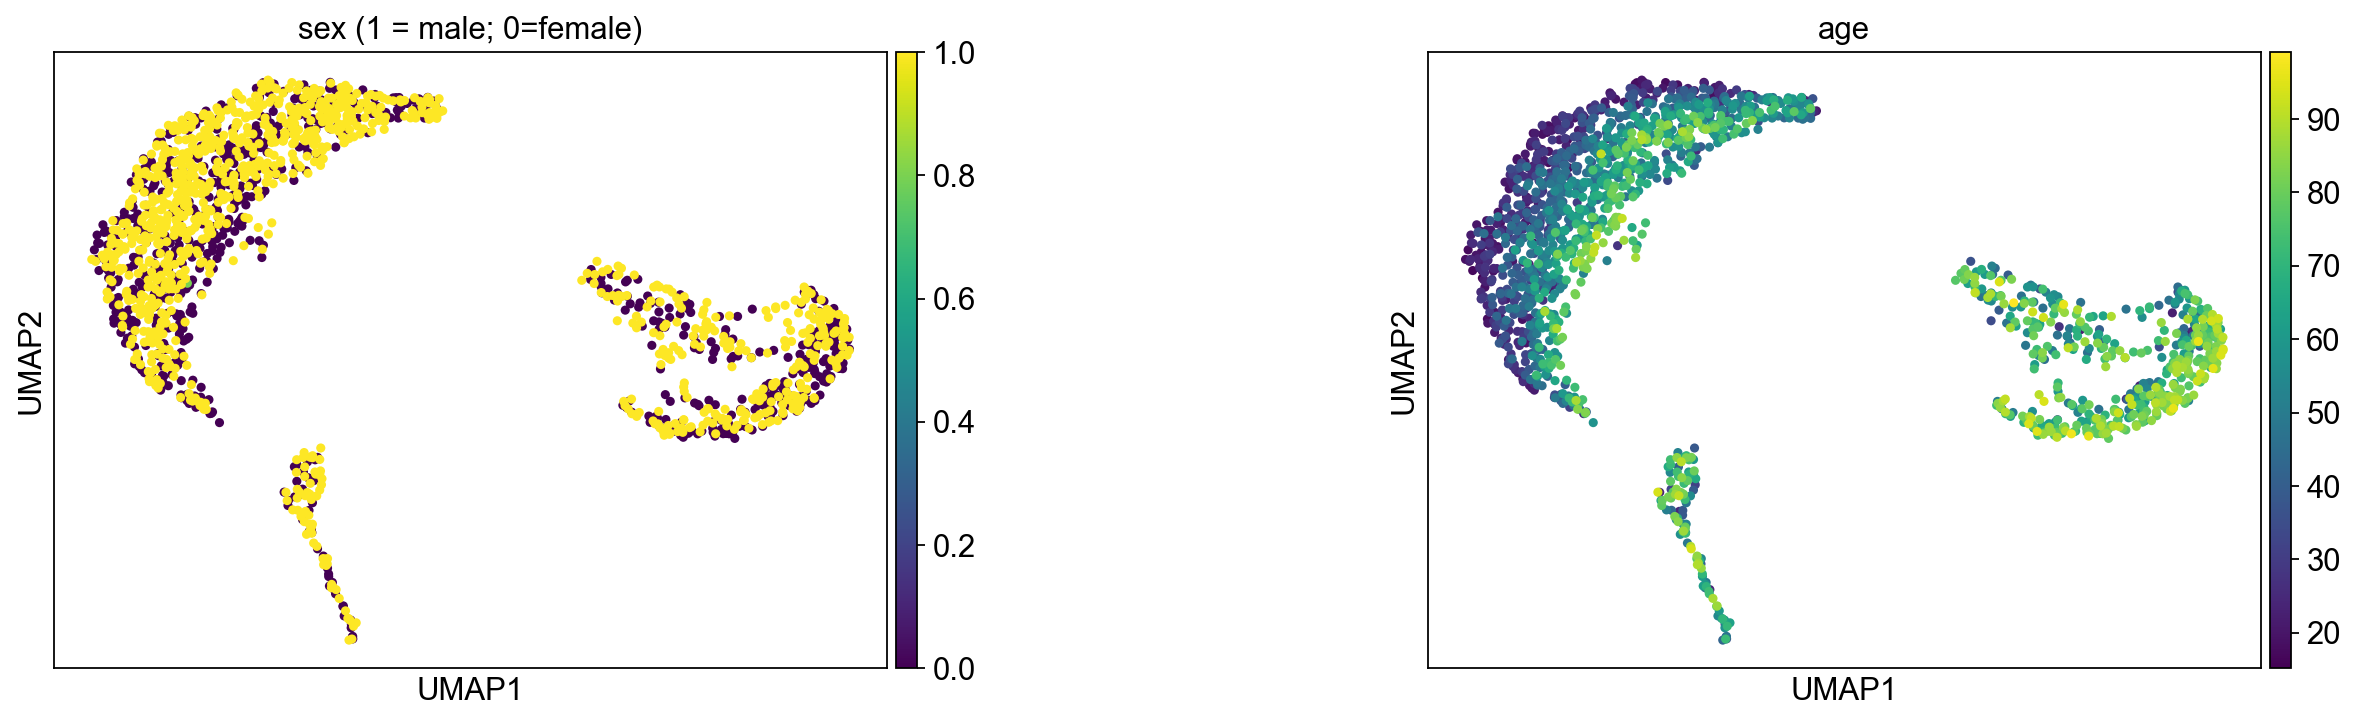

In [35]:
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(
    adata,
    color=["gender_num", "age"],
    wspace=0.5,
    title=["sex (1 = male; 0=female)", "age"],
)

#### Hospital statistics

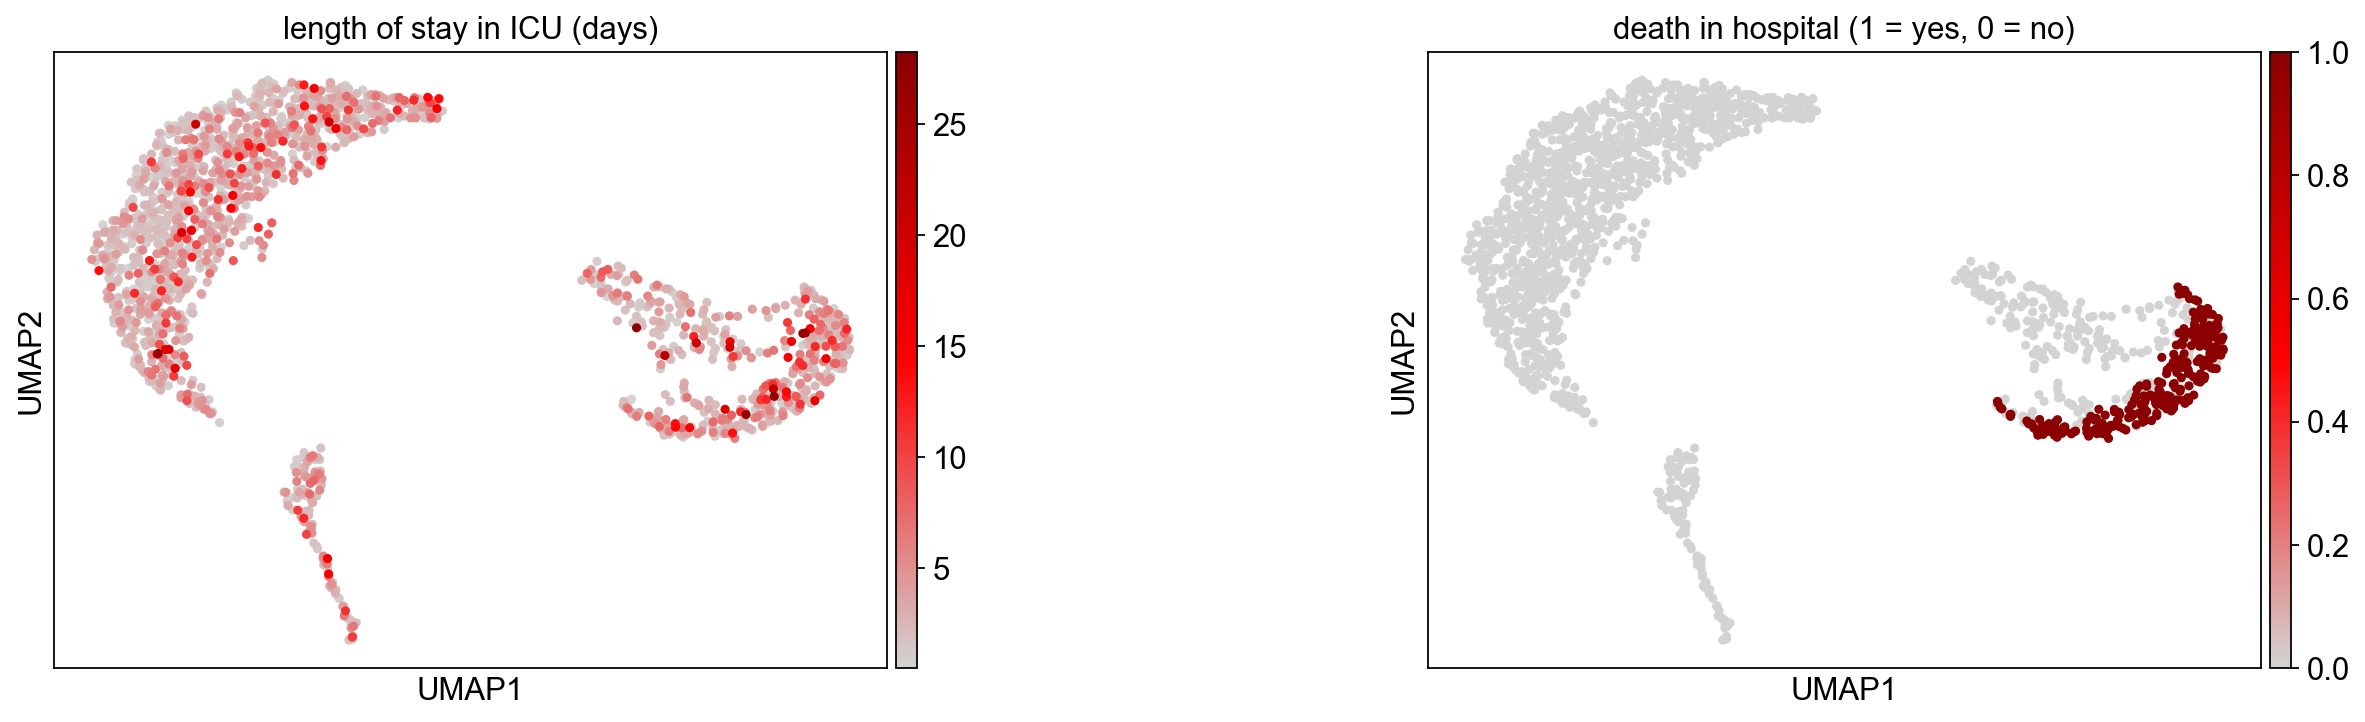

In [36]:
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(
    adata,
    color=["icu_los_day", "hosp_exp_flg"],
    wspace=0.5,
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["length of stay in ICU (days)", "death in hospital (1 = yes, 0 = no)"],
)

#### Comorbidities

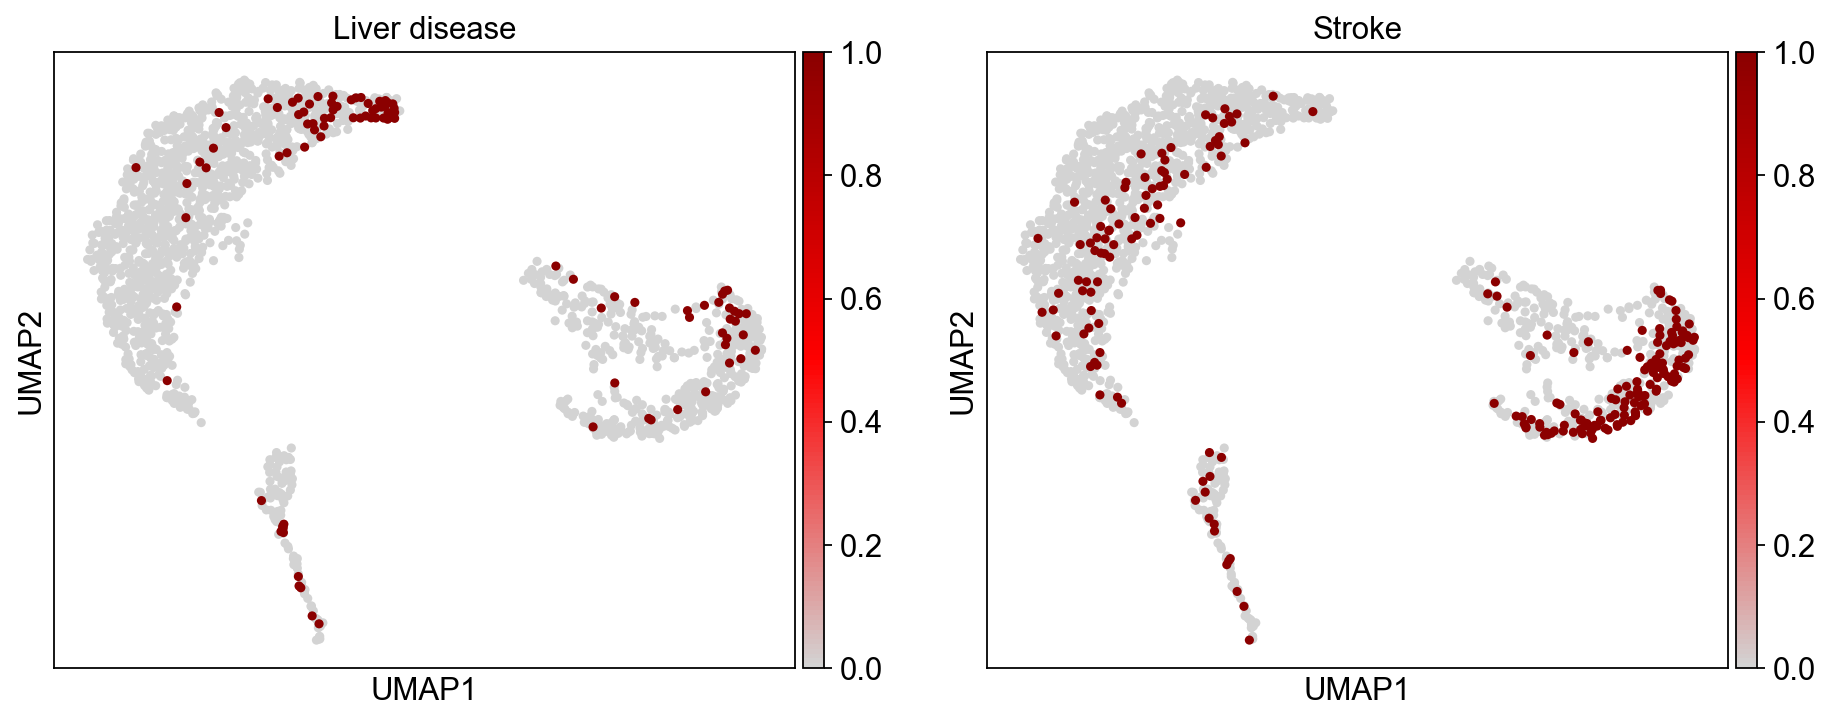

In [37]:
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(
    adata,
    color=["liver_flg", "stroke_flg"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Liver disease", "Stroke"],
    ncols=2
)

#### Lab parameters

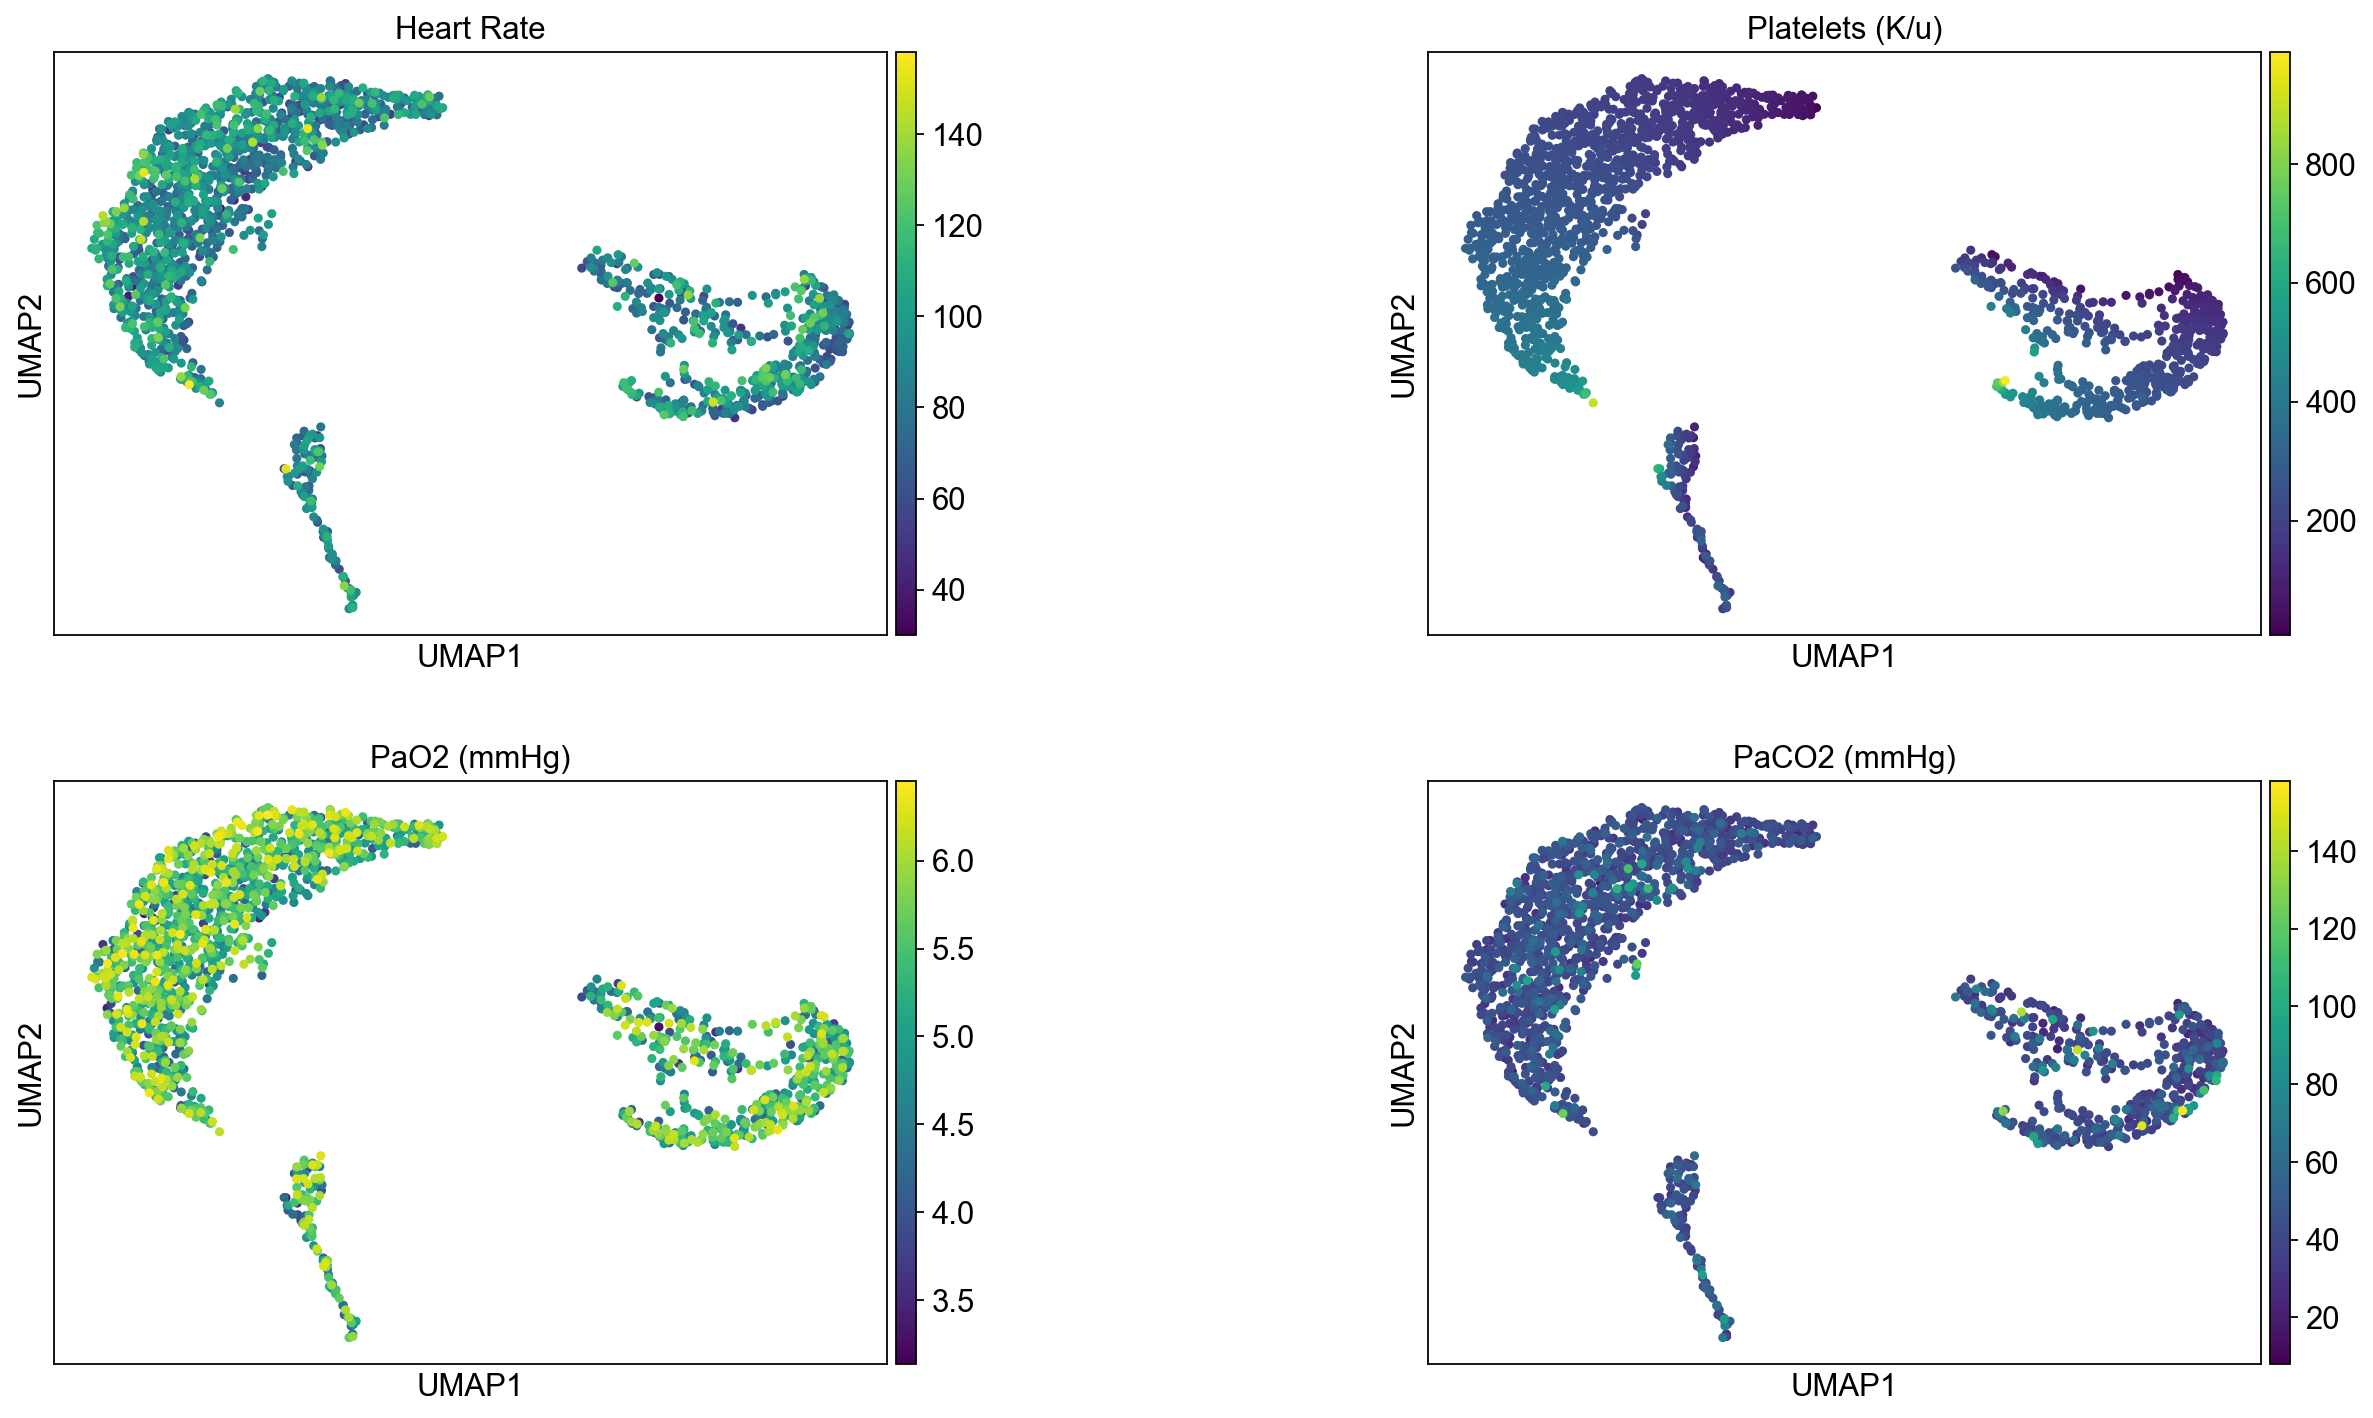

In [38]:
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(
    adata,
    color=["hr_1st","platelet_first", "po2_first",  "pco2_first"],
    wspace=0.5, ncols = 2,
    title=["Heart Rate","Platelets (K/u)", "PaO2 (mmHg)",  "PaCO2 (mmHg)"],
)

### Cluster analysis

To make more sense of the embedding it is often times useful to determine clusters through e.g. community detection as implemented in the [Leiden algorithm](https://www.nature.com/articles/s41598-019-41695-z). Moreover, clustering allows for unbiased detection of features that are changed between clusters and therefore intersting for us.  

#### Cluster identification

The implementation in ehrapy allows for the setting of a resolution which determines the number of found clusters. It is often times useful to play around with the parameter.

In [39]:
ep.tl.leiden(adata, resolution=0.3, key_added="leiden_0_3")

The leiden algorithm added a key to **obs** (`leiden_0_3`) that stores the clusters. These can subsequently be visualized in the UMAP embedding.

In [40]:
adata.obs.head(4)

service_unit day_icu_intime  missing_values_abs  missing_values_pct  \
0         SICU      Friday                      0                 0.0   
1         MICU      Saturday                    0                 0.0   
2         MICU      Friday                      0                 0.0   
3         SICU      Saturday                    0                 0.0   

  leiden_0_3  
0          2  
1          1  
2          1  
3          2

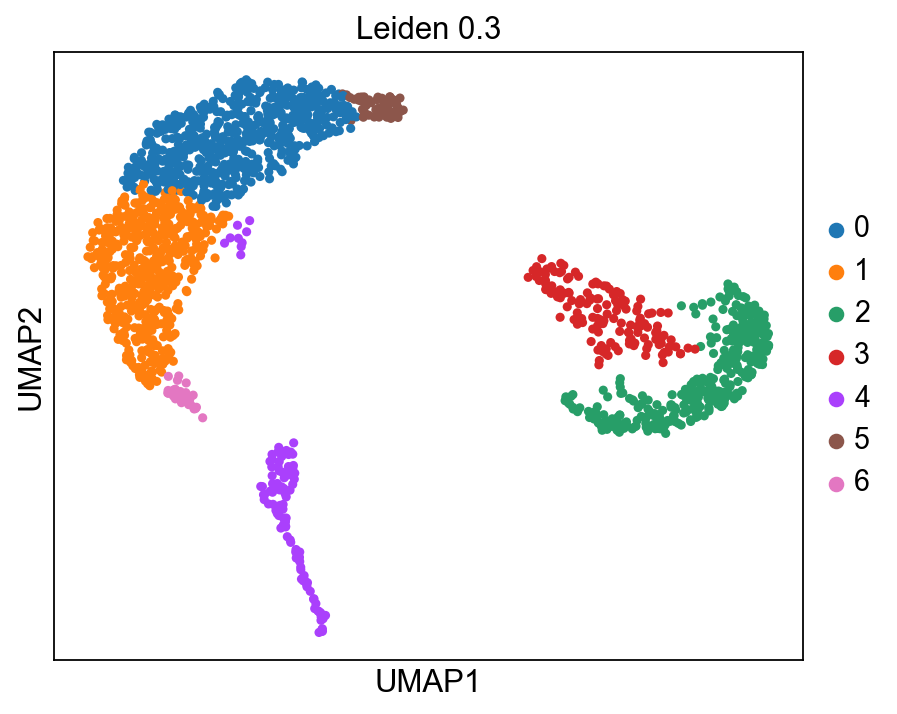

In [41]:
ep.pl.umap(adata, color=["leiden_0_3"], title="Leiden 0.3")

Next, we can explore certain features which are special for certrain clusters and could therefore be used for annotation.
&NewLine;  
&NewLine;  


#### Cluster features

To identify cluster-specific markers, ehrapy provides the `ep.tl.rank_features_groups()` function, which allows statistical tests between the cluster groups to determine significantly enriched or lowered values.

In [42]:
ep.tl.rank_features_groups(adata, groupby="leiden_0_3")

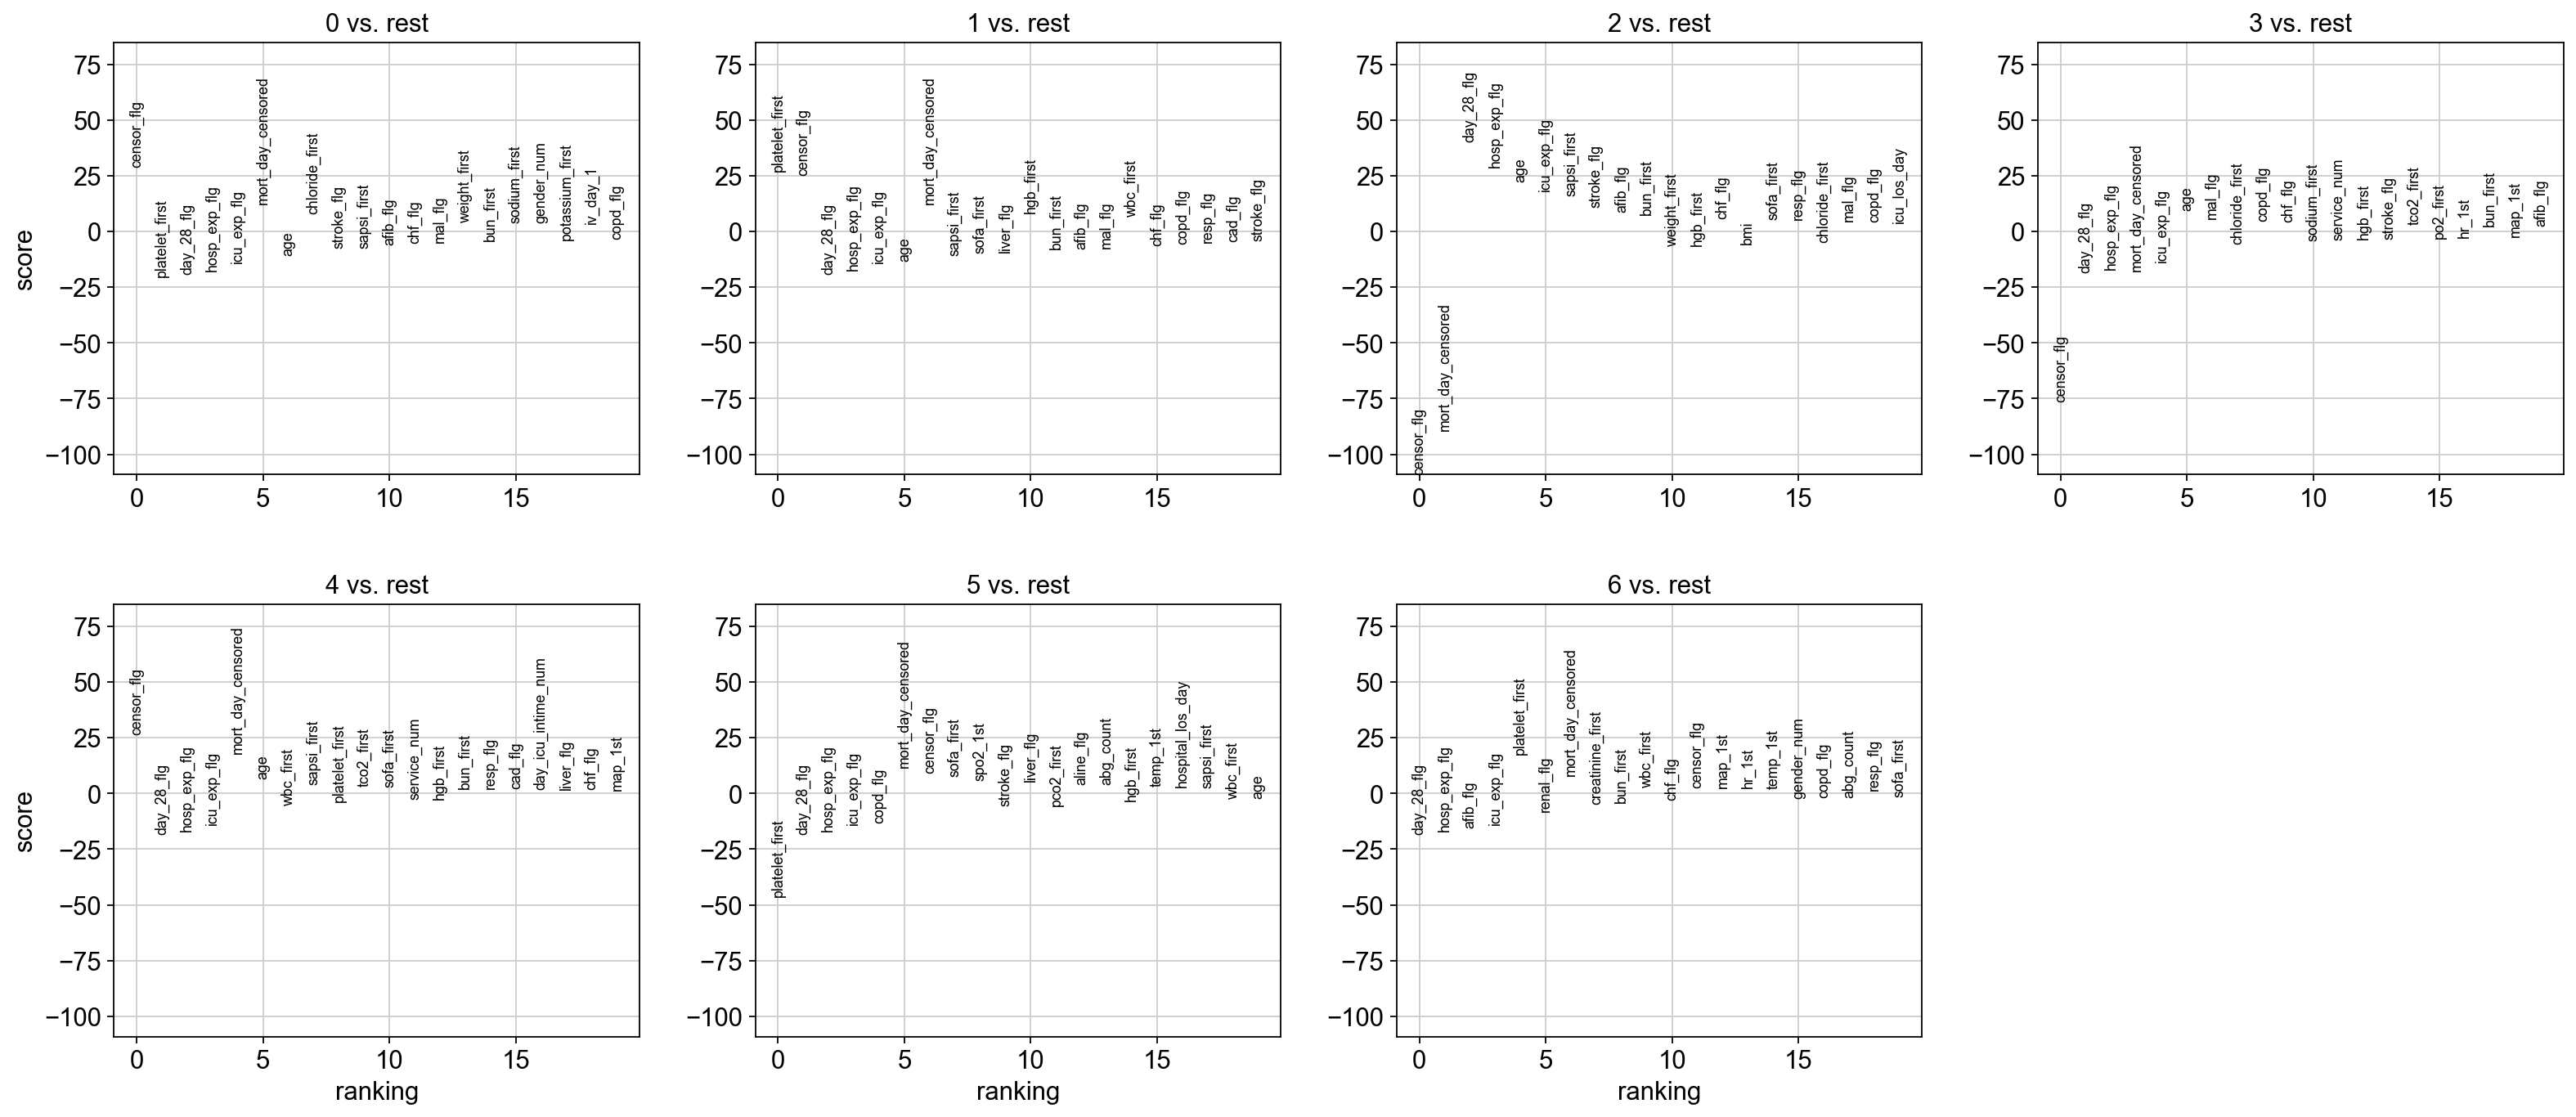

In [43]:
ep.pl.rank_features_groups(adata, key="rank_features_groups", ncols = 4)

We can also get the top features per cluster as a DataFrame.

In [44]:
df = ep.ad.get_rank_features_df(adata, group=["0", "1", "2", "3", "4", "5", "6"])
df = df.loc[(df["logfoldchanges"] > 0) & (df["pvals_adj"] < 0.05), ]

E.g. we can check the top marker of cluster 2.

In [45]:
df.loc[df["group"] == "2", ]

group            names     scores  logfoldchanges          pvals  \
90      2       day_28_flg  40.163418       30.255802  1.602011e-131   
91      2     hosp_exp_flg  29.032896       29.949463   2.669161e-94   
92      2              age  22.384300       32.357395   5.525346e-82   
93      2      icu_exp_flg  18.332195       29.256935   9.043693e-53   
94      2      sapsi_first  16.116190        5.267409   5.856240e-48   
95      2       stroke_flg  10.808780        2.592192   5.484350e-24   
96      2         afib_flg   8.854611        2.218182   2.853562e-17   
97      2        bun_first   7.671074       11.443713   1.161684e-13   
100     2          chf_flg   5.822193        1.433449   1.151670e-08   
102     2       sofa_first   5.543683        1.169838   4.843230e-08   
103     2         resp_flg   5.389370        0.754994   1.104212e-07   
105     2          mal_flg   4.514720        1.007265   8.127339e-06   
106     2         copd_flg   4.397418        1.280134   1.387258e-05   
107     2      icu_los_day   3.928232        1.416589   9.959582e-05   
109     2       tco2_first   3.041532        1.463894   2.487531e-03   
111     2          cad_flg   2.846287        0.938949   4.630552e-03   
112     2  potassium_first   2.670771        0.201073   7.825826e-03   
113     2        abg_count   2.405999        2.330037   1.656540e-02   

         pvals_adj  
90   2.349616e-130  
91    2.936077e-93  
92    4.862305e-81  
93    6.632041e-52  
94    3.681065e-47  
95    3.016393e-23  
96    1.395075e-16  
97    5.111410e-13  
100   3.897962e-08  
102   1.420681e-07  
103   3.036582e-07  
105   1.986683e-05  
106   3.212598e-05  
107   2.191108e-04  
109   4.975061e-03  
111   8.489346e-03  
112   1.377345e-02  
113   2.803375e-02

&NewLine;  
&NewLine;  

From this table we can also extract the top features in every cluster and highlight those either on the UMAP or as violins plots by cluster.

In [46]:
top_features = df.groupby("group").head(5)
top_features = pd.Series(top_features["names"].unique())
top_features

0            censor_flg
1     mort_day_censored
2        chloride_first
3          weight_first
4          sodium_first
5        platelet_first
6             hgb_first
7             wbc_first
8            day_28_flg
9          hosp_exp_flg
10                  age
11          icu_exp_flg
12          sapsi_first
13              mal_flg
14             copd_flg
15              chf_flg
16           tco2_first
17           sofa_first
18             spo2_1st
19            liver_flg
20              map_1st
dtype: object

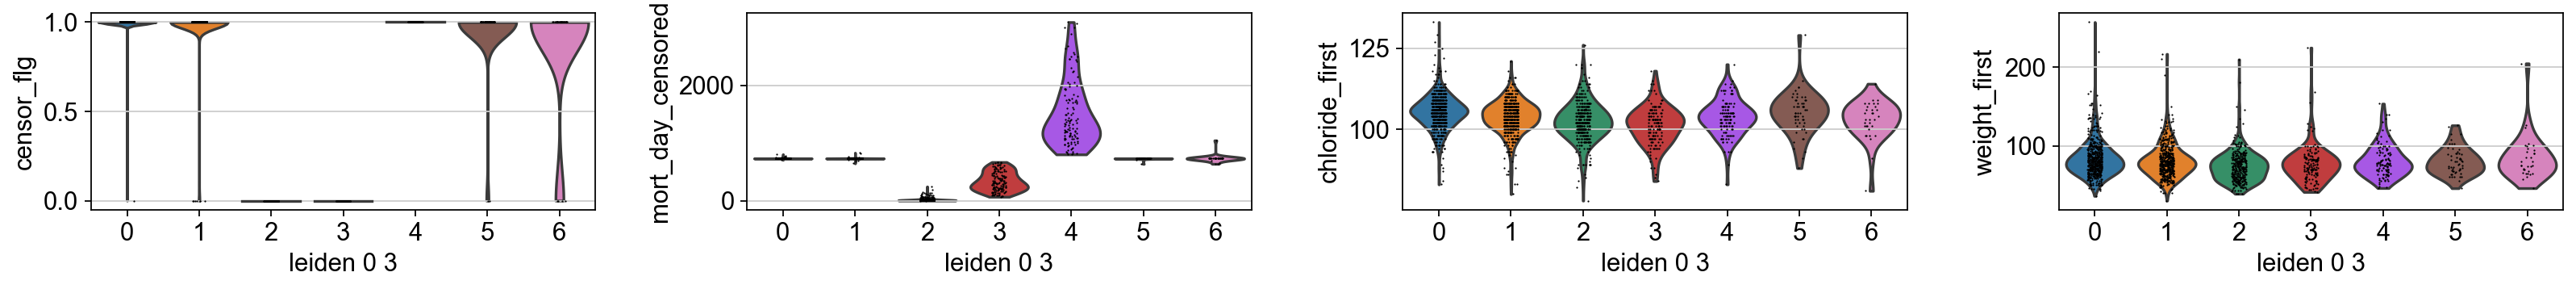

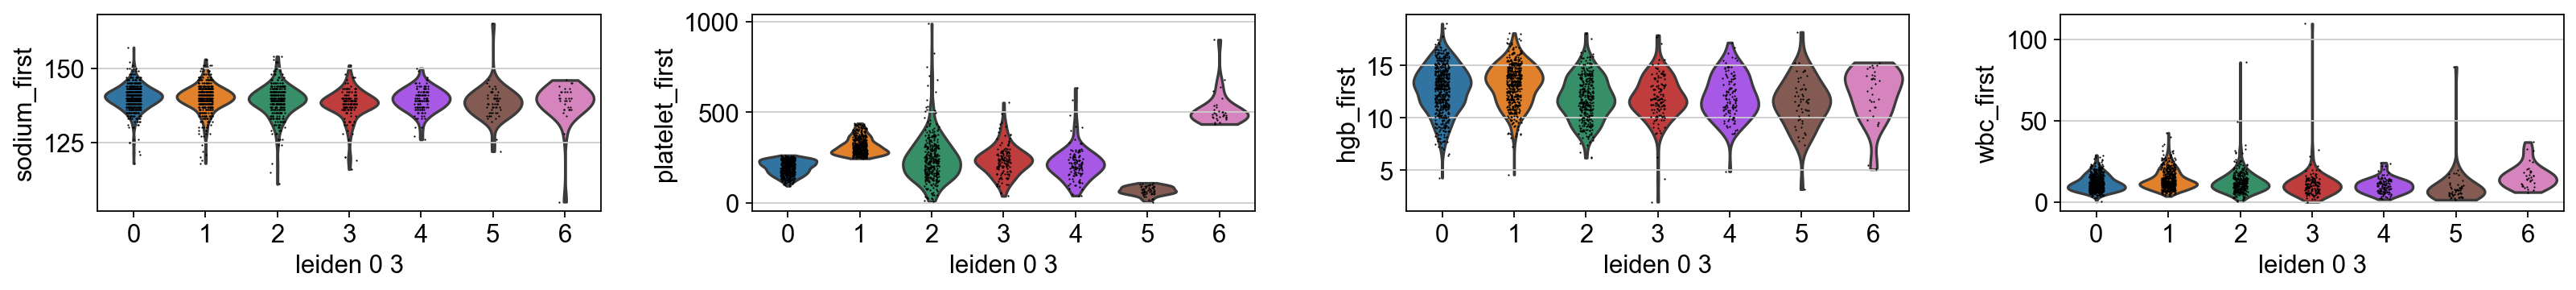

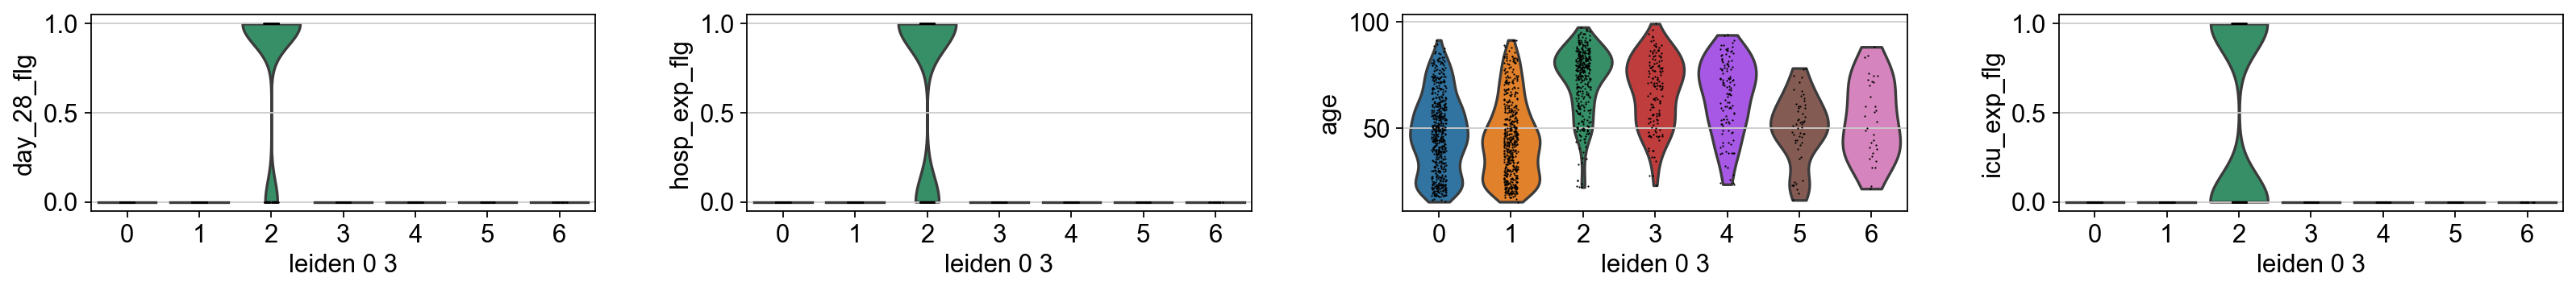

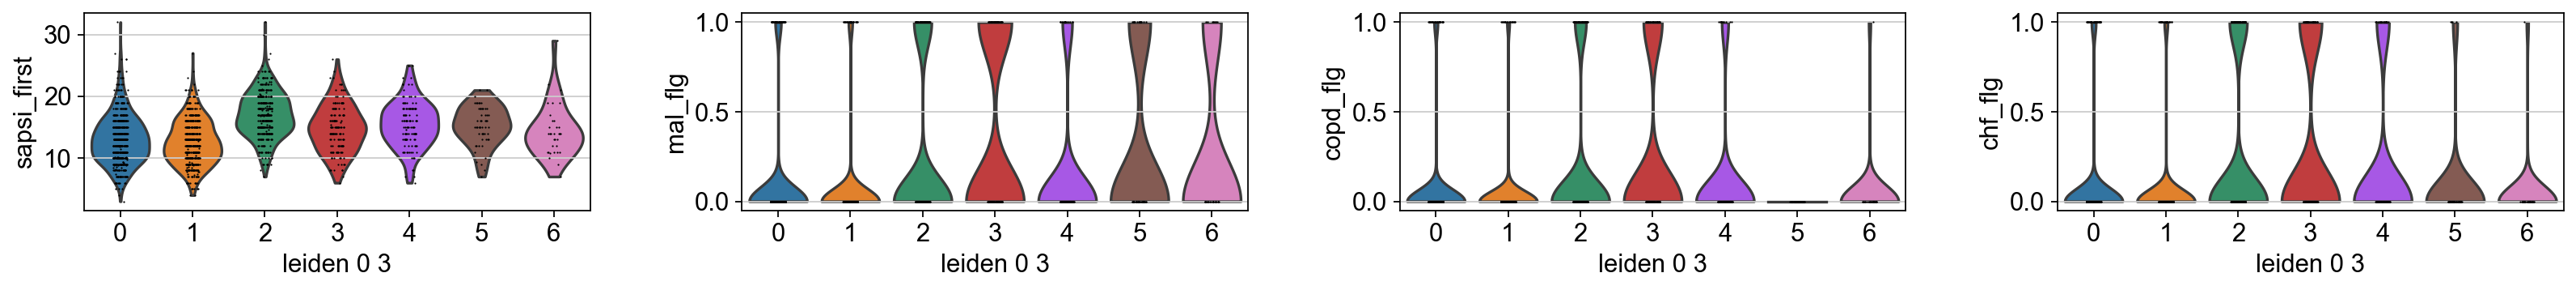

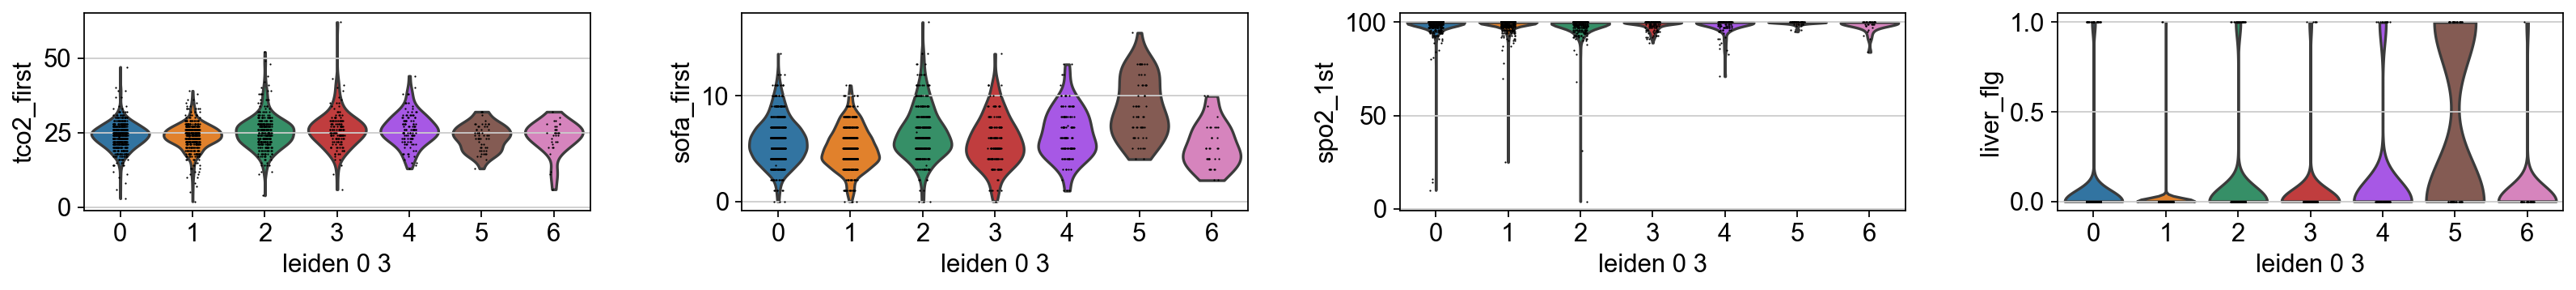

In [47]:
ep.settings.set_figure_params(figsize=(5, 2))
ep.pl.violin(adata, keys=top_features[0:4], groupby = "leiden_0_3")
ep.pl.violin(adata, keys=top_features[4:8], groupby = "leiden_0_3")
ep.pl.violin(adata, keys=top_features[8:12], groupby = "leiden_0_3")
ep.pl.violin(adata, keys=top_features[12:16], groupby = "leiden_0_3")
ep.pl.violin(adata, keys=top_features[16:20], groupby = "leiden_0_3")

#### Cluster annotation

With the knowledge of the cluster features, together with the UMAP plots from above we can annotate the clusters.

In [48]:
adata.obs["annotation"] = "NA"

In [49]:
annotation = {
    "0": "weight+",
    "1": "platelet+",
    "2": "age+/stroke+/deceased+",
    "3": "age+/malignancy+/copd+",
    "4": "age+/late_deceased+",
    "5": "liver+/sofa+",    
    "6": "platelet+/heart_rate+"

}

In [50]:
adata.obs["annotation"] = [
    annotation[l] if l in annotation.keys() else l for l in adata.obs["leiden_0_3"]
]

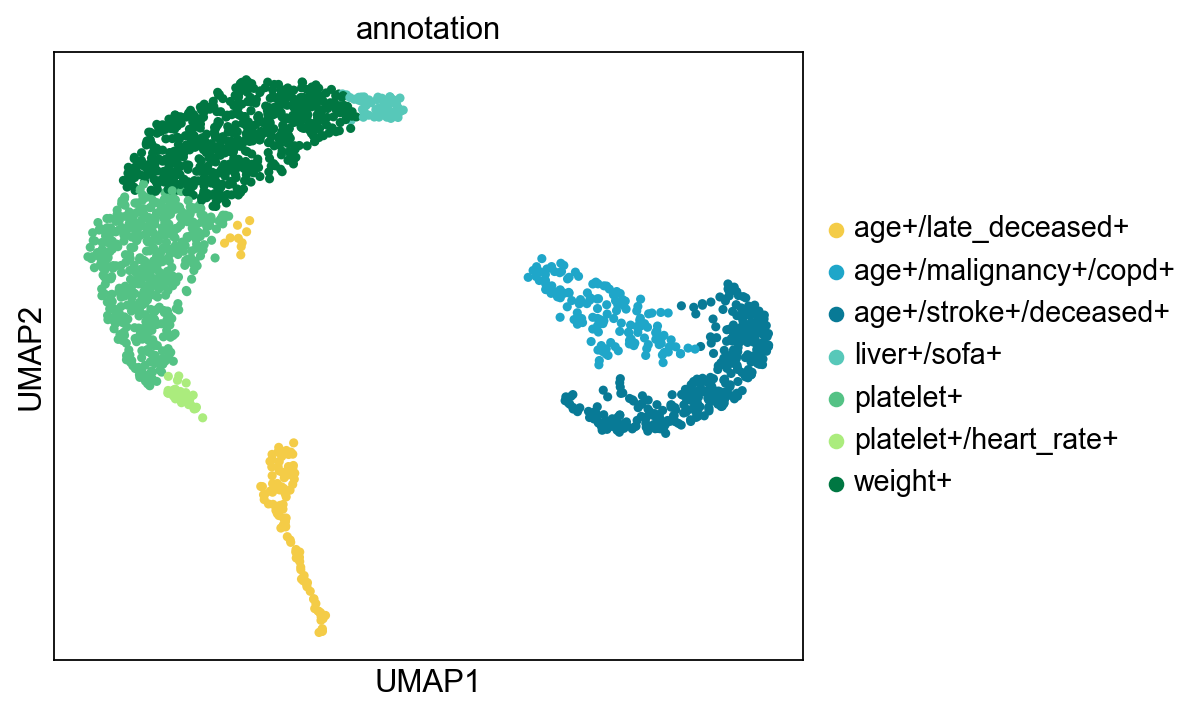

In [51]:
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(adata, color="annotation", palette= {
    "weight+": "#007742",
    "platelet+": "#54C285",
    "age+/stroke+/deceased+": "#087A96",
    "age+/malignancy+/copd+": "#1FA6C9",
    "age+/late_deceased+": "#F4CC47",
    "liver+/sofa+": "#57C8B9",    
    "platelet+/heart_rate+": "#ABEC7D"
})

### Additional downstream analysis 

After these basic ehrapy analysis steps, additional downstream analysis can be performed (see also other tutorials). 

#### PAGA

It might also be of interest to infer trajectories to learn about dynamic processes and stage transitions.
ehrapy offers several [trajectory inference](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#clustering-and-trajectory-inference) algorithms for this purpose. One of those is partition-based graph abstraction (PAGA).

In [52]:
ep.tl.paga(adata, groups="leiden_0_3")

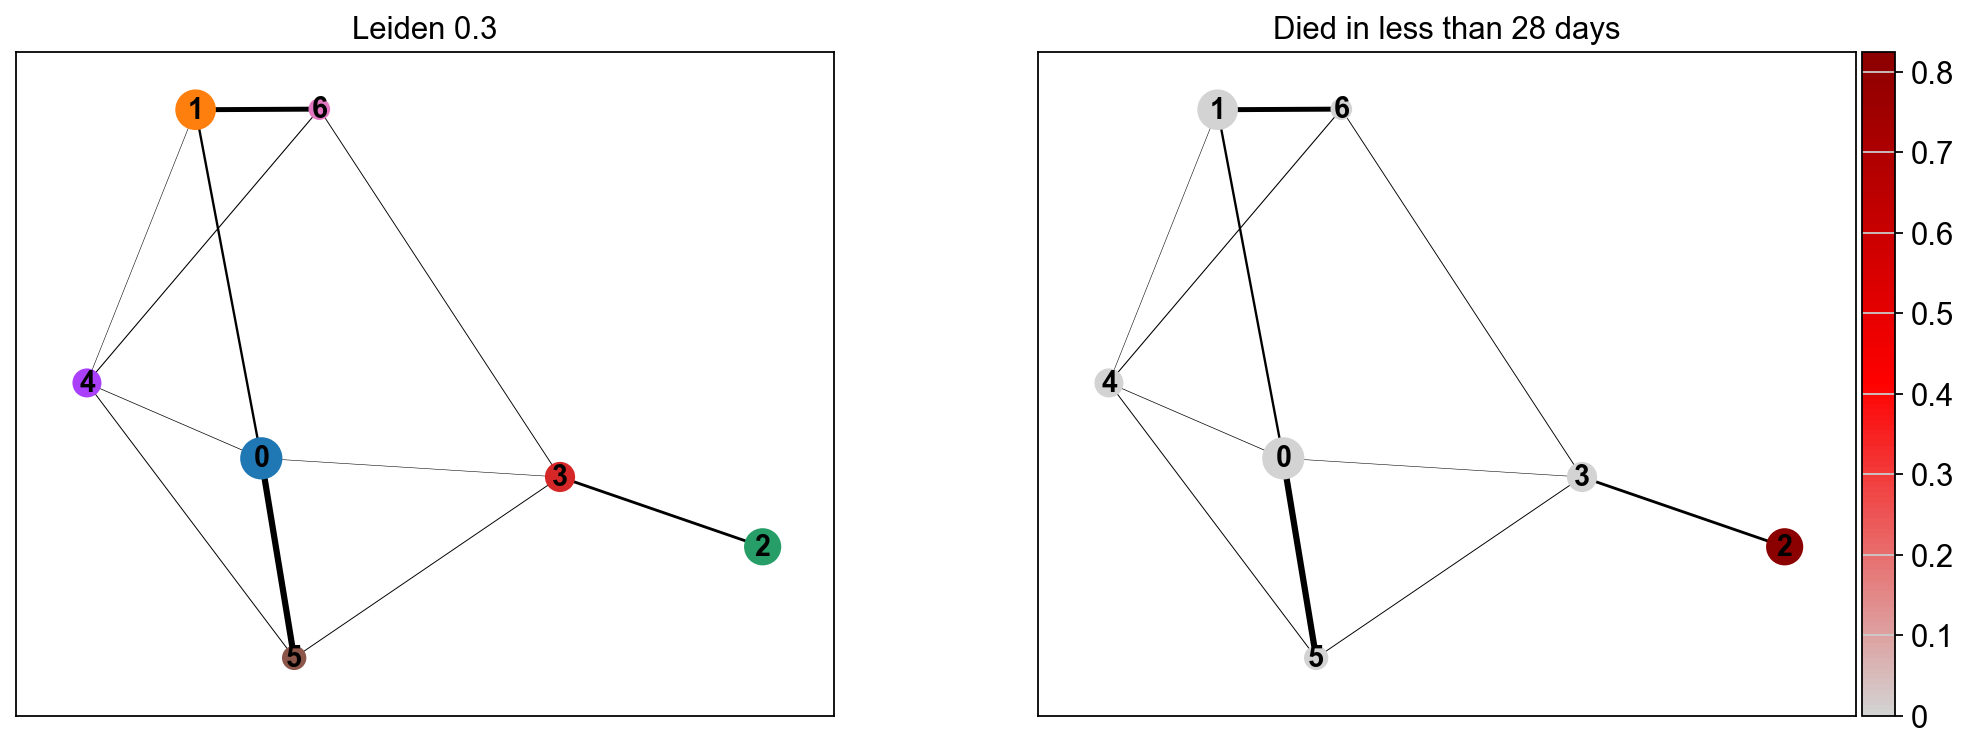

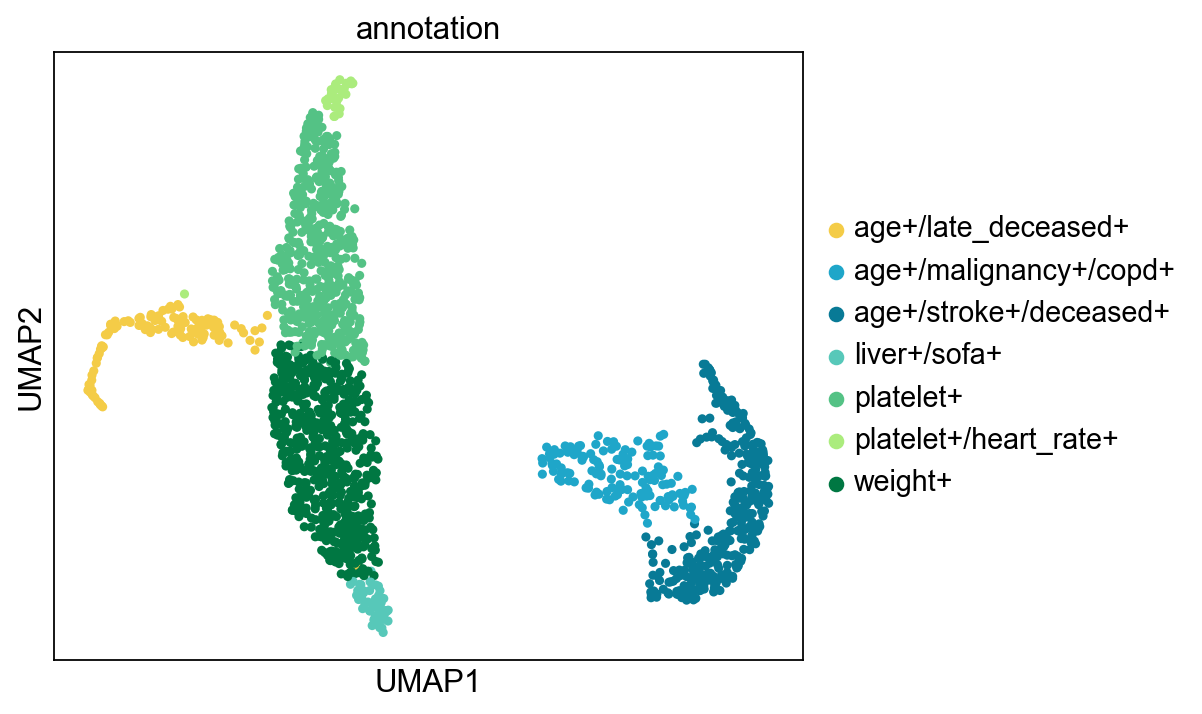

In [53]:
ep.pl.paga(
    adata,
    color=["leiden_0_3", "day_28_flg"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Leiden 0.3", "Died in less than 28 days"],
)

ep.tl.umap(adata, init_pos="paga")
ep.pl.umap(adata, color=["annotation"])

In [54]:
ep.tl.draw_graph(adata, init_pos="paga")

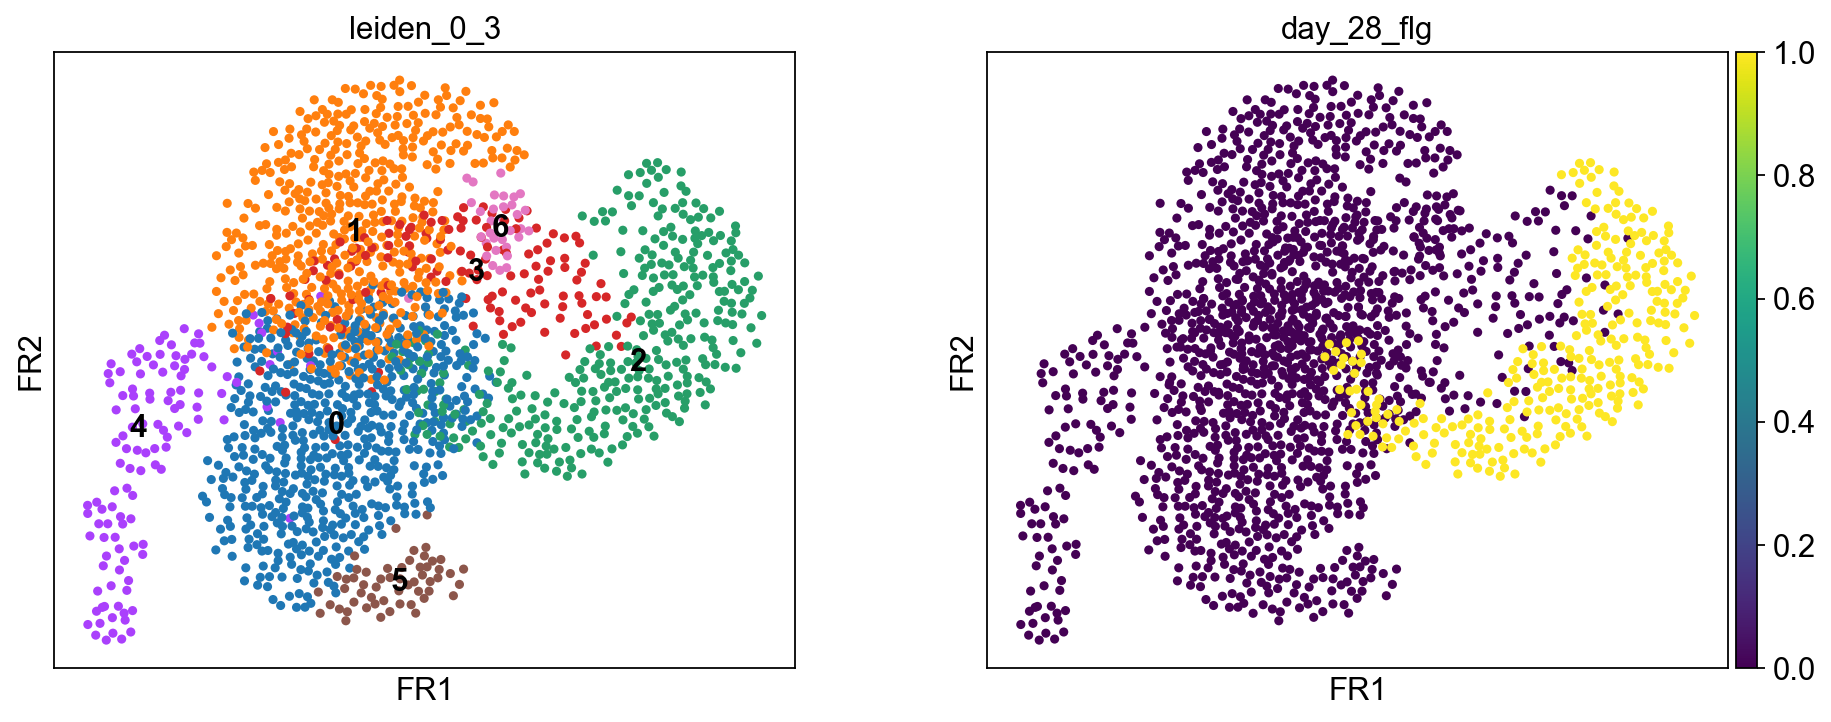

In [55]:
ep.pl.draw_graph(adata, color=["leiden_0_3", "day_28_flg"], legend_loc="on data")

_________________

## Exporting results

We save all of our computations and our final state into an `.h5ad` file. It can then be read again using the `ep.io.read()` function, e.g. like this: 

In [56]:
ep.io.write("mimic_2.h5ad", adata)

_________________

## Conclusion

The MIMIC-II IAC dataset comprises electronic health records (EHR) summarized in 46 features from 1776 individuals. This high dimensional data is not easy to interpret and many interesting and previously unknown features can be overseen when just focusing on selected well-defined features. To overcome this hurdle, we applied ehrapy on the MIMIC-II IAC dataset. 

ehrapy is based on the AnnData data structure and scanpy pipeline to allow for efficient analysis. We used the build-in functions to preprocess the data, perform QC with imputation of missing data and reduce the dimensionality, resulting in PCA and UMAP embeddings. After performing all these steps, we explored the data by visualizing multiple features on the UMAP embedding, giving a first glance at the patient structure.  

To identify patient groups in and unbiased fashion, we clustered our data using the Leiden algorithm resulting in 7 different patient clusters. Calculation of cluster-specific features allowed us to annotate the clusters according to the most prominent markers. We saw a strong difference between patients that deceased, had higher age and severe comorbidities such as a stroke and COPD (clusters 2+3) and those that had milder features such as increased platelets and weight (clusters 0+1). Close to these two clusters were two additional clusters that harbored more severe features such as increased heart rate (cluster 5) and high SOFA score with liver disease (cluster 6), indicating potential patient trajectories. Cluster 4 clustered apart from all the others and consists of patients that deceased several months/years after leaving the ICU. 
<br><br><br>


To explore the [patient fate](https://ehrapy.readthedocs.io/en/latest/tutorials/notebooks/mimic_2_fate.html) and [survival](https://ehrapy.readthedocs.io/en/latest/tutorials/notebooks/mimic_2_survival_analysis.html) in more detail, continue with our other tutorials. 

_________________

## References

* Raffa, J. (2016). Clinical data from the MIMIC-II database for a case study on indwelling arterial catheters (version 1.0). PhysioNet. https://doi.org/10.13026/C2NC7F.

* Raffa J.D., Ghassemi M., Naumann T., Feng M., Hsu D. (2016) Data Analysis. In: Secondary Analysis of Electronic Health Records. Springer, Cham

* Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

* McInnes et al., (2018). UMAP: Uniform Manifold Approximation and Projection. Journal of Open Source Software, 3(29), 861, https://doi.org/10.21105/joss.00861

* Traag, V.A., Waltman, L. & van Eck, N.J. From Louvain to Leiden: guaranteeing well-connected communities. Sci Rep 9, 5233 (2019). https://doi.org/10.1038/s41598-019-41695-z

* Wolf, F.A., Hamey, F.K., Plass, M. et al. PAGA: graph abstraction reconciles clustering with trajectory inference through a topology preserving map of single cells. Genome Biol 20, 59 (2019). https://doi.org/10.1186/s13059-019-1663-x

_________________

## Package versions

In [35]:
ep.print_versions()

-----
ehrapy              0.5.0
rich                NA
session_info        1.0.0
-----
Levenshtein                 0.21.1
PIL                         10.0.0
anndata                     0.9.1
anyio                       NA
argcomplete                 NA
arrow                       1.2.3
astor                       0.8.1
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
autograd                    NA
autograd_gamma              NA
babel                       2.12.1
backcall                    0.2.0
bs4                         4.12.2
cachetools                  5.3.1
category_encoders           2.6.1
certifi                     2023.05.07
cffi                        1.15.1
charset_normalizer          2.1.1
comm                        0.1.3
cryptography                41.0.1
cvxopt                      1.3.1
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
db_dtypes                   1.1.1
debugpy                     1.6.7
decorator                   5.1.1
deep_translator             1.9.1
deepl                       1.15.0
defusedxml                  0.7.1
executing                   1.2.0
fastjsonschema              NA
fhiry                       3.0.0
formulaic                   0.6.3
fqdn                        NA
future                      0.18.3
google                      NA
graphlib                    NA
grpc                        1.56.0
grpc_status                 NA
h5py                        3.9.0
html5lib                    1.1
idna                        3.4
igraph                      0.10.5
interface_meta              1.3.0
ipykernel                   6.24.0
isoduration                 NA
jedi                        0.18.2
jinja2                      3.1.2
joblib                      1.3.1
json5                       NA
jsonpointer                 2.4
jsonschema                  4.18.0
jsonschema_specifications   NA
jupyter_events              0.6.3
jupyter_server              2.7.0
jupyterlab_server           2.23.0
kiwisolver                  1.4.4
leidenalg                   0.10.0
lifelines                   0.27.7
llvmlite                    0.40.1
markupsafe                  2.1.3
matplotlib                  3.7.2
matplotlib_inline           0.1.6
missingno                   0.5.2
mpl_toolkits                NA
natsort                     8.4.0
nbformat                    5.9.1
numba                       0.57.1
numpy                       1.24.4
overrides                   NA
packaging                   23.1
pandas                      2.0.3
parso                       0.8.3
patsy                       0.5.3
pexpect                     4.8.0
pickleshare                 0.7.5
pkg_resources               NA
platformdirs                3.8.1
prometheus_client           NA
prompt_toolkit              3.0.39
psutil                      5.9.5
ptyprocess                  0.7.0
pure_eval                   0.2.2
pyarrow                     12.0.1
pydev_ipython               NA
pydevconsole                NA
pydevd                      2.9.5
pydevd_file_utils           NA
pydevd_plugins              NA
pydevd_tracing              NA
pygments                    2.15.1
pyparsing                   3.0.9
pythonjsonlogger            NA
pytz                        2023.3
rapidfuzz                   3.1.1
referencing                 NA
requests                    2.31.0
rfc3339_validator           0.1.4
rfc3986_validator           0.1.1
rpds                        NA
scanpy                      1.9.3
scipy                       1.9.3
seaborn                     0.12.2
send2trash                  NA
six                         1.16.0
sklearn                     1.3.0
sniffio                     1.3.0
soupsieve                   2.4.1
sphinxcontrib               NA
stack_data                  0.6.2
statsmodels                 0.13.5
texttable                   1.6.7
thefuzz                     0.19.0
threadpoolctl           